In [2]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.50.0
    Uninstalling shap-0.50.0:
      Successfully uninstalled shap-0.50.0


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-colorblind')
%matplotlib inline

## Чтение данных

In [6]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('./data/titanic.csv', usecols=use_cols)

In [7]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250


<Axes: >

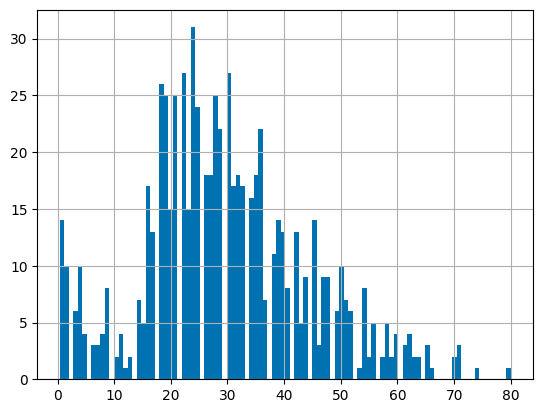

In [8]:
data.Age.hist(bins=100)

## Типы колонок

In [9]:
data.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Fare,float64


## Статистики данных

In [10]:
data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Fare
count,891.000000,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,32.204208
std,0.486592,0.836071,NaN,14.526497,1.102743,49.693429
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,20.125000,0.000000,7.910400
50%,0.000000,3.000000,NaN,28.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,38.000000,1.000000,31.000000


## Barplot

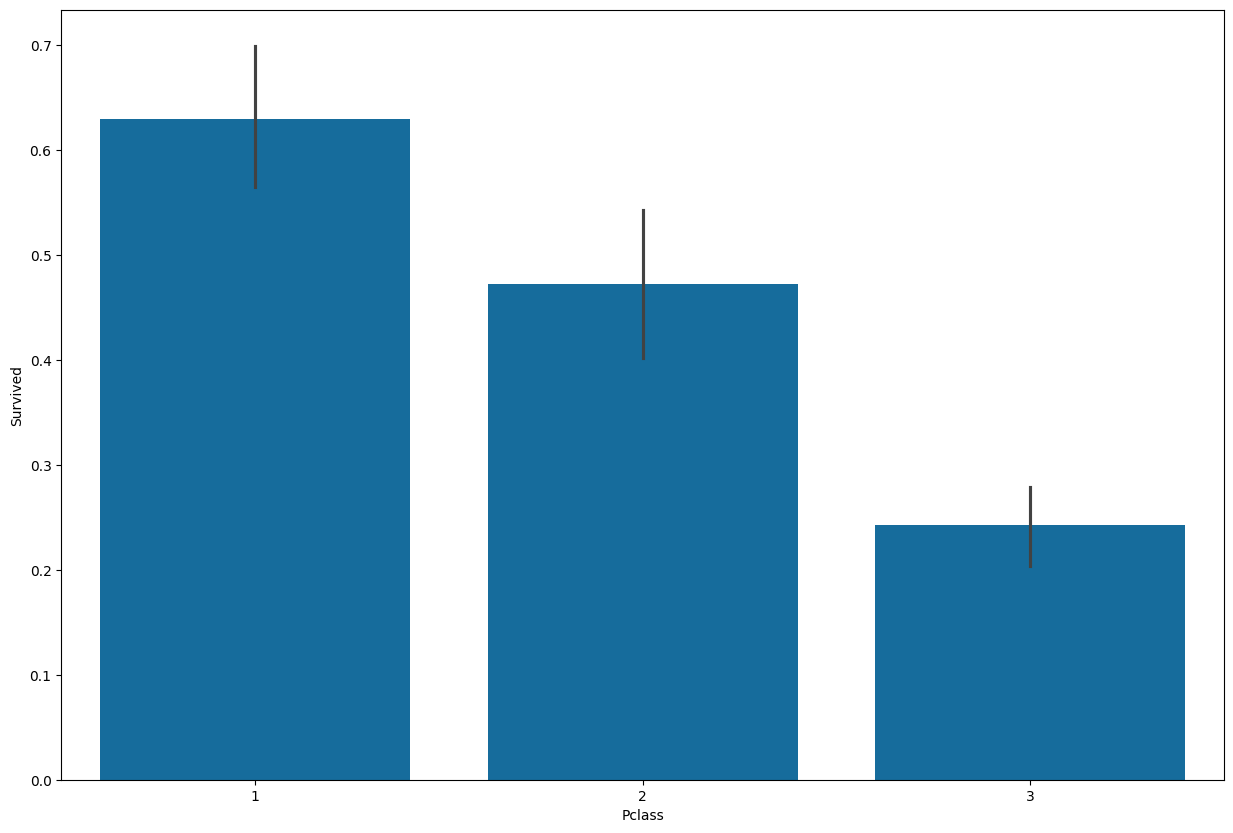

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x='Pclass',y='Survived',data=data)
plt.show()

## Countplot

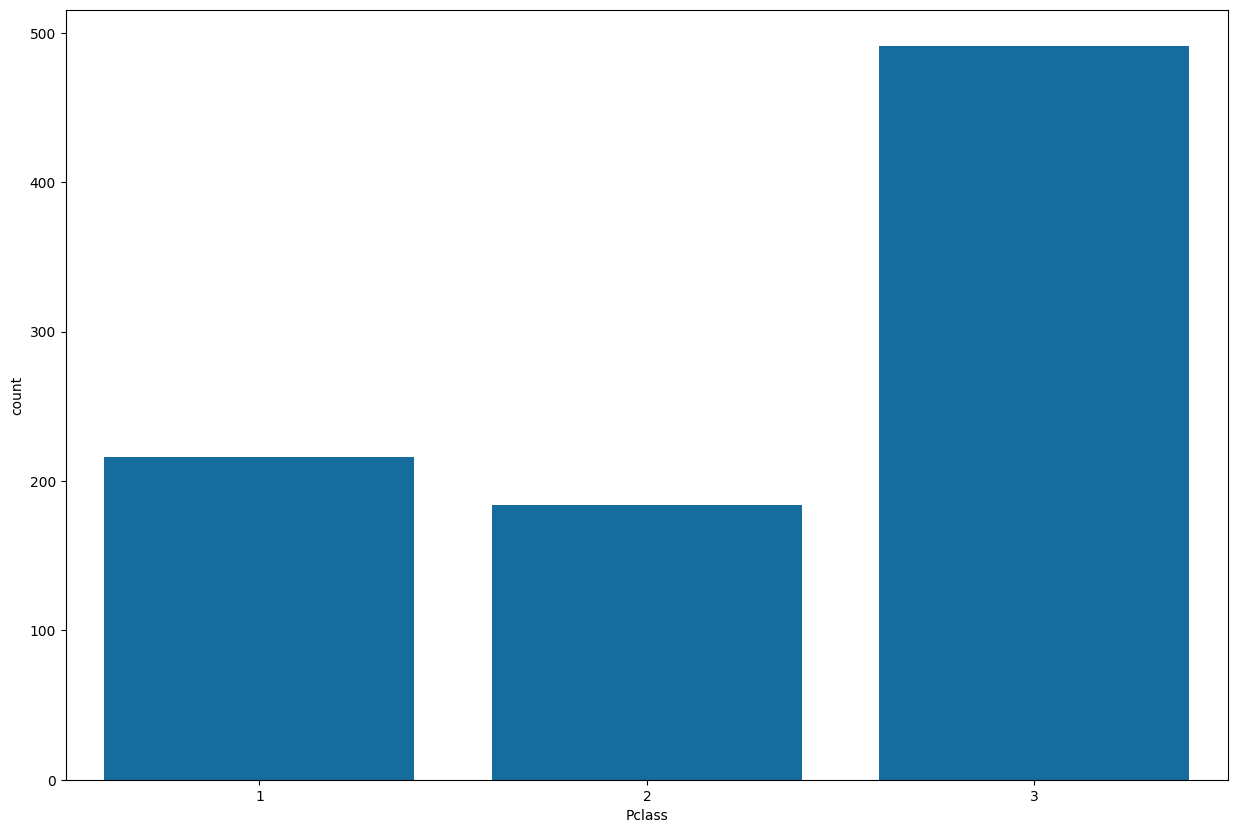

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x='Pclass',data=data)
plt.show()

## Boxplot

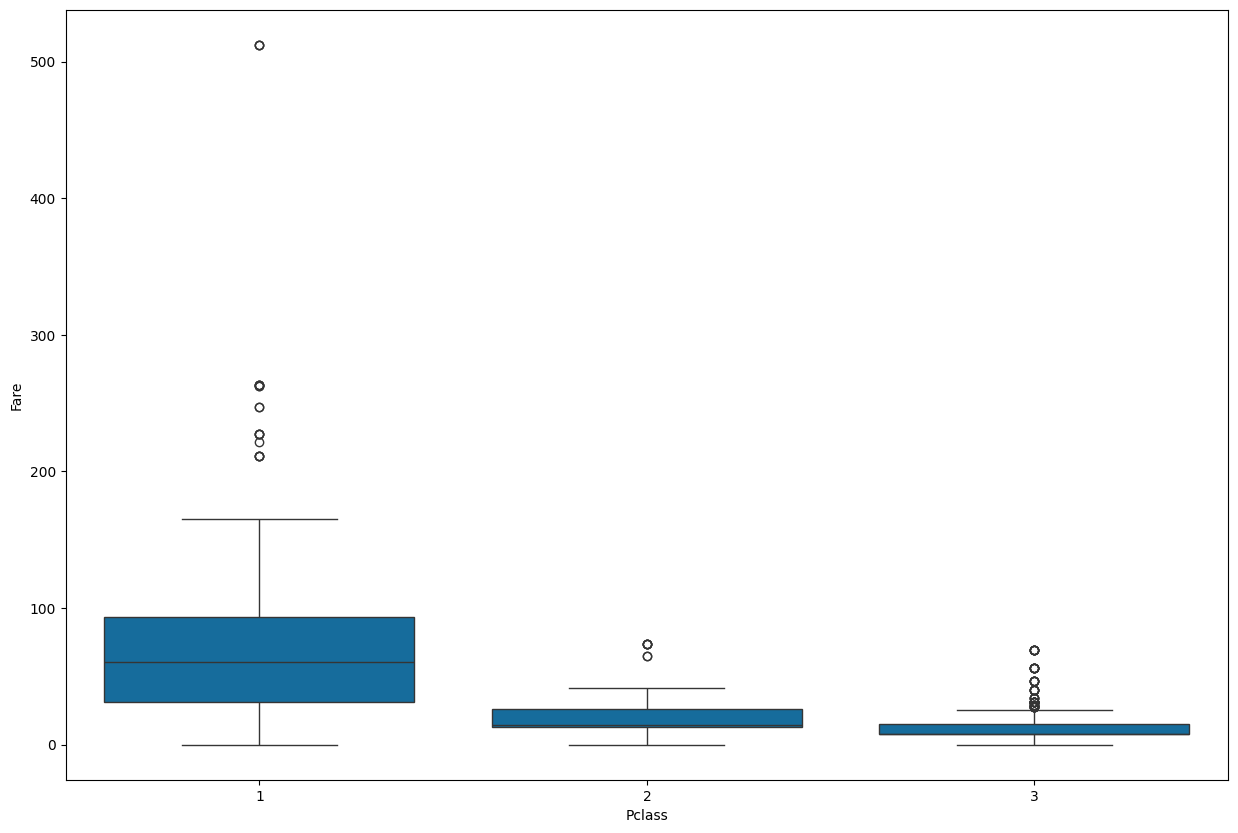

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Fare',data=data)
plt.show()

## Distplot (распредление непрерывной переменной)

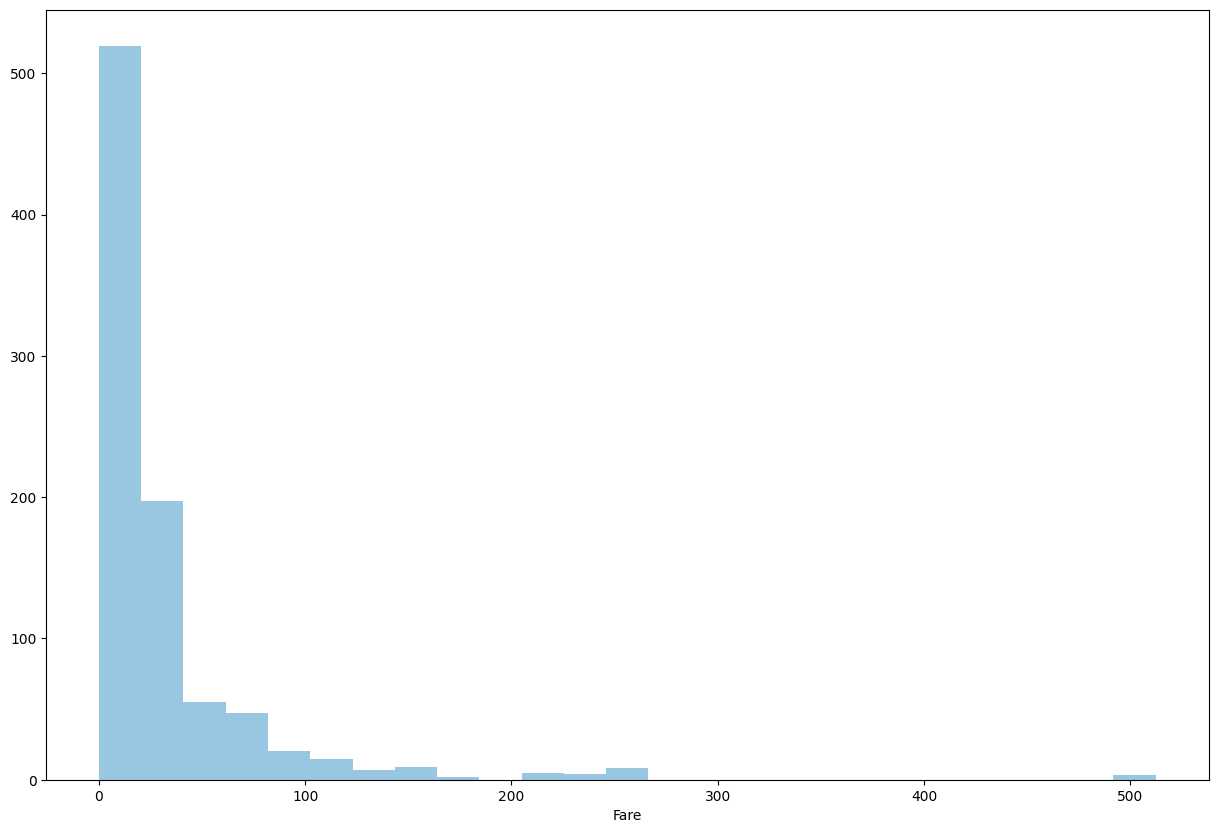

In [14]:
plt.figure(figsize=(15,10))
sns.distplot(a=data['Fare'],kde=False, bins=25)
plt.show()

## Scatter plot

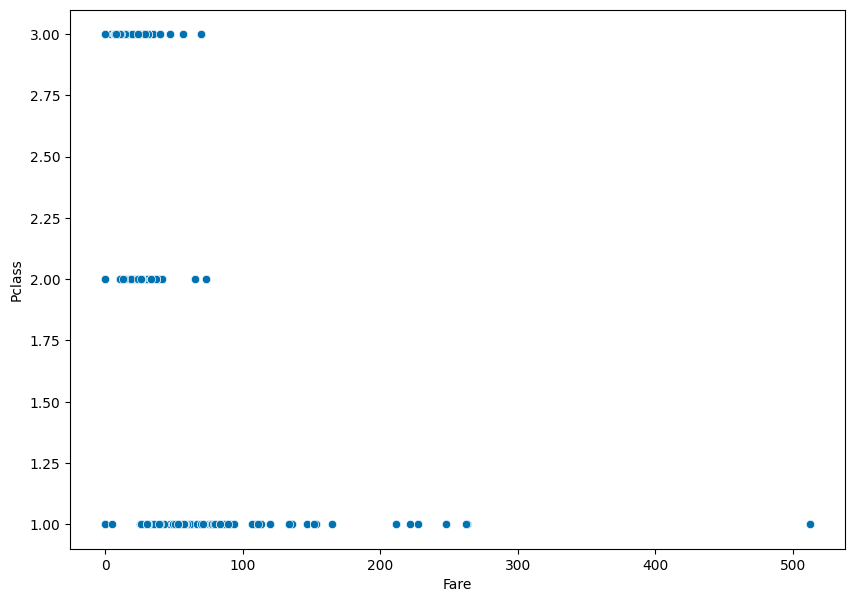

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=data["Fare"],y=data["Pclass"],data=data)
plt.show()

## Матрица корреляции

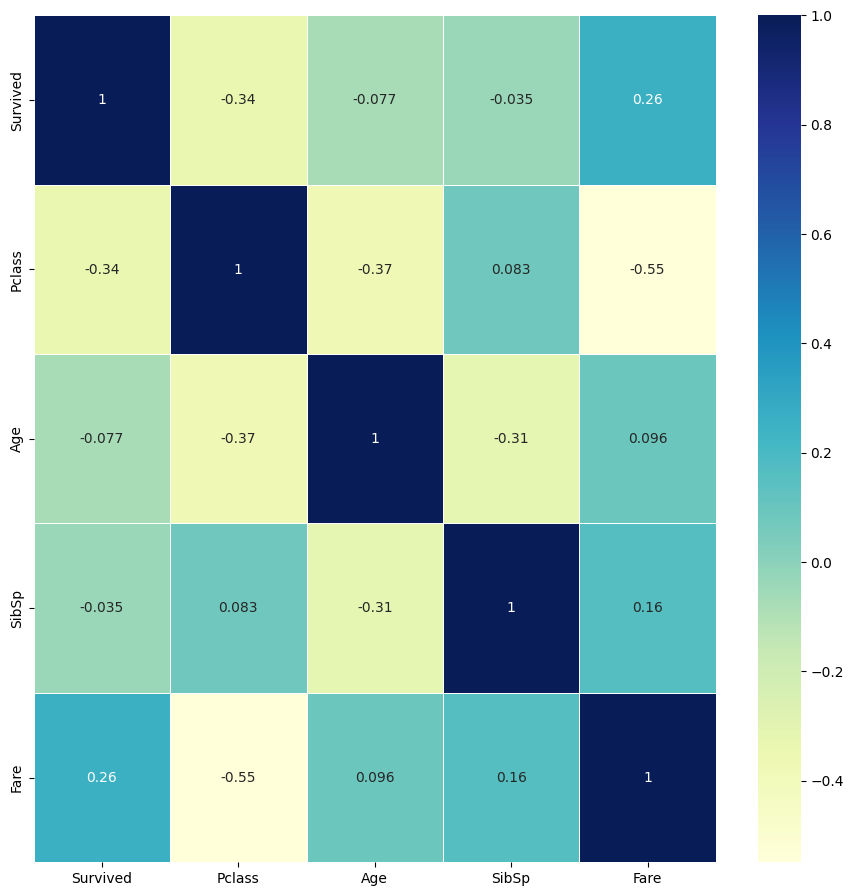

In [16]:
corrmat = data.corr(numeric_only=True)
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,cmap="YlGnBu",linewidths=.5,annot=True)
plt.show()

## Heatmap

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


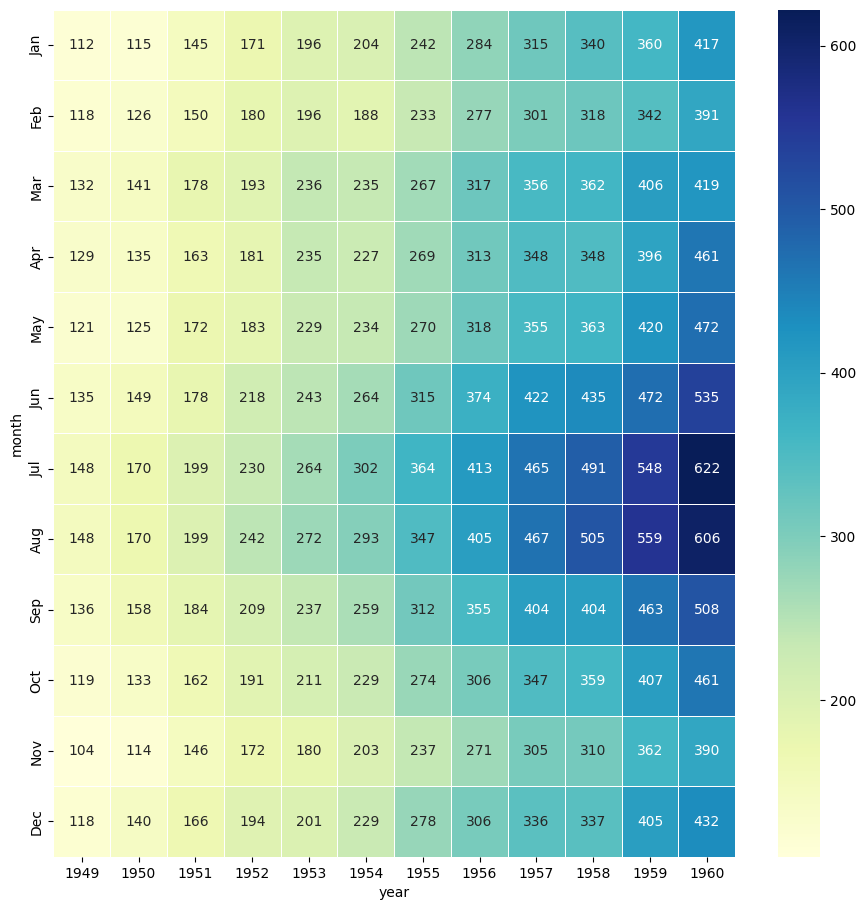

In [17]:
flights = sns.load_dataset("flights")
print(flights.head(5))
flights = flights.pivot(index="month", columns="year", values="passengers")


fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(flights,cmap="YlGnBu",linewidths=.5,annot=True,fmt='d')
plt.show()

# Заполнение пропущенных значений

# Почему отсутствующие данные важны при обучении модели


* Некоторые алгоритмы не могут работать при наличии пропущенных значений.
* Даже для алгоритмов, которые учитывают отсутствующие данные, без их обработки модель может привести к неточным выводам.

Важно понимать механизмы, по которым отсутствующие поля появляются в наборе данных.

* Отсутствие полностью случайно
* Отсутствие случайно
* Отсутствие не случайно - зависит от ненаблюдаемых предикторов
* Отсутствие не случайно - зависит от самого пропущенного значения

### Как предположить механизм отсутствия

Можно определить механизм отсутствия по следующим критериям:

1. **Понимание бизнес-логики.** Во многих ситуациях можно предположить механизм, исследовав логику, лежащую в основе этой переменной.
2. **Статистический тест.** Разделите набор данных на те, в которых есть/нет пропусков, и выполните t-тест, чтобы определить, есть ли значимые различия. Если они есть, можно предположить, что отсутствие не является случайным.


## Проверка пропущенных значений


Проверка количества и процента пропущенных значений для каждого признака

In [18]:
result = pd.concat([data.isnull().sum(),data.isnull().mean()],axis=1)
result.rename(index=str,columns={0:'total missing',1:'proportion'})

,total missing,proportion
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Fare,0,0.000000


## Простое удаление

Удаление примеров, где пропущены значения

In [19]:
data2 = data.copy(deep=True)
data2 = data2.dropna(axis=0,inplace=False)
data2.shape

(714, 6)

## Дополнительный признак для обозначения пропущенного значения

In [20]:
# Создаем копию исходного датасета для безопасной обработки данных.
data3 = data.copy(deep=True)

# Задаем список столбцов, в которых мы хотим проверить наличие пропущенных значений.
NA_col = ['Age']

# Проходим по каждому столбцу из списка.
for i in NA_col:
    # Проверяем, есть ли пропущенные значения в текущем столбце.
    if data3[i].isnull().sum() > 0:
        # Если пропущенные значения есть, то создаем новый бинарный столбец,
        # в котором 1 обозначает наличие пропуска, а 0 - отсутствие.
        data3[i + '_is_NA'] = np.where(data3[i].isnull(), 1, 0)
    else:
        # Если пропущенных значений в текущем столбце нет, выводим сообщение о его отсутствии.
        print("Столбец %s не содержит пропущенных значений" % i)

# Выводим первые 8 строк обработанного датасета для проверки.
data3.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_is_NA
0,0,3,male,22.0,1,7.2500,0
1,1,1,female,38.0,1,71.2833,0
2,1,3,female,26.0,0,7.9250,0
3,1,1,female,35.0,1,53.1000,0
4,0,3,male,35.0,0,8.0500,0
5,0,3,male,NaN,0,8.4583,1
6,0,1,male,54.0,0,51.8625,0
7,0,3,male,2.0,3,21.0750,0


## Заполнение пропущенного значения экстремальной константой

In [21]:
data4 = data.copy(deep=True)
NA_col = ['Age']
impute_value = -999
for i in NA_col:
    if data4[i].isnull().sum()>0:
        data4[i+'_'+str(impute_value)] = data4[i].fillna(impute_value)
    else:
        print("Column %s has no missing cases" % i)

In [22]:
data4.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_-999
0,0,3,male,22.0,1,7.2500,22.0
1,1,1,female,38.0,1,71.2833,38.0
2,1,3,female,26.0,0,7.9250,26.0
3,1,1,female,35.0,1,53.1000,35.0
4,0,3,male,35.0,0,8.0500,35.0
5,0,3,male,NaN,0,8.4583,-999.0
6,0,1,male,54.0,0,51.8625,54.0
7,0,3,male,2.0,3,21.0750,2.0


In [23]:
data4[['Age', 'Age_-999']].head(8)

,Age,Age_-999
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
5,NaN,-999.0
6,54.0,54.0
7,2.0,2.0


## Заполнение пропущенного значения медианой/модой/средним

In [24]:
print(data["Age"].mean())
print(data["Age"].median())
print(data["Age"].mode())

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64


In [25]:
data5 = data4.copy(deep=True)
NA_col = ['Age']
strategy = 'median'
for i in NA_col:
    if data5[i].isnull().sum()>0:
        if strategy=='mean':
            data5[i+'_impute_mean'] = data5[i].fillna(data[i].mean())
        elif strategy=='median':
            data5[i+'_impute_median'] = data5[i].fillna(data[i].median())
        elif strategy=='mode':
            data5[i+'_impute_mode'] = data5[i].fillna(data[i].mode()[0])
    else:
        print("Column %s has no missing" % i)

data5.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_-999,Age_impute_median
0,0,3,male,22.0,1,7.2500,22.0,22.0
1,1,1,female,38.0,1,71.2833,38.0,38.0
2,1,3,female,26.0,0,7.9250,26.0,26.0
3,1,1,female,35.0,1,53.1000,35.0,35.0
4,0,3,male,35.0,0,8.0500,35.0,35.0


##  Заполнением хвостами расправления

Заполнение NA, значениями которые находятся в конце распределения - $\mu + 3*\sigma$



In [26]:
data6 = data5.copy(deep=True)
NA_col = ['Age']
for i in NA_col:
    if data6[i].isnull().sum()>0:
        data6[i+'_impute_end_of_distr'] = data6[i].fillna(data[i].mean()+3*data[i].std())
    else:
        print("Column %s has no missing" % i)

data6.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_-999,Age_impute_median,Age_impute_end_of_distr
0,0,3,male,22.0,1,7.2500,22.0,22.0,22.00000
1,1,1,female,38.0,1,71.2833,38.0,38.0,38.00000
2,1,3,female,26.0,0,7.9250,26.0,26.0,26.00000
3,1,1,female,35.0,1,53.1000,35.0,35.0,35.00000
4,0,3,male,35.0,0,8.0500,35.0,35.0,35.00000
5,0,3,male,NaN,0,8.4583,-999.0,28.0,73.27861
6,0,1,male,54.0,0,51.8625,54.0,54.0,54.00000
7,0,3,male,2.0,3,21.0750,2.0,2.0,2.00000


##  Случайное заполнение

Заполнение случайным значением из доступного множества трейн значений

In [27]:
# Создаем копию исходного датасета для безопасной обработки данных.
data7 = data.copy(deep=True)

# Задаем список столбцов, в которых мы хотим заполнить пропущенные значения случайными данными.
NA_col = ['Age']

# Проходим по каждому столбцу из списка.
for i in NA_col:
    # Проверяем, есть ли пропущенные значения в текущем столбце.
    if data7[i].isnull().sum() > 0:
        # Создаем новый столбец, который будет содержать заполненные случайными данными пропуски из оригинального столбца.
        data7[i + '_random'] = data7[i]

        # Извлекаем случайную выборку (random_sample) из непустых значений текущего столбца для заполнения пропусков.
        random_sample = data7[i].dropna().sample(data7[i].isnull().sum(), random_state=42)

        # Устанавливаем индексы пропущенных значений (NaN) равными индексам в random_sample.
        random_sample.index = data7[data7[i].isnull()].index

        # Заполняем пропущенные значения в новом столбце значениями из random_sample.
        data7.loc[data7[i].isnull(), str(i) + '_random'] = random_sample
    else:
        # Если пропущенных значений в текущем столбце нет, выводим сообщение об этом.
        print("Столбец %s не содержит пропущенных значений" % i)

# Выводим первые 8 строк обработанного датасета для проверки.
data7.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_random
0,0,3,male,22.0,1,7.2500,22.0
1,1,1,female,38.0,1,71.2833,38.0
2,1,3,female,26.0,0,7.9250,26.0
3,1,1,female,35.0,1,53.1000,35.0
4,0,3,male,35.0,0,8.0500,35.0
5,0,3,male,NaN,0,8.4583,42.0
6,0,1,male,54.0,0,51.8625,54.0
7,0,3,male,2.0,3,21.0750,2.0


# Работа с выбросами

# Выбросы в данных

**Определение:** *Выброс* - это наблюдение, которое отклоняется настолько сильно от других наблюдений, что вызывает подозрения в том, что оно было сгенерировано другим механизмом.

**Примечание:** Выбросы, в зависимости от контекста, либо требуют особого внимания, либо должны быть полностью игнорированы. Например, необычная транзакция на кредитной карте обычно является признаком мошеннической деятельности, в то время как высота человека в 1600 см, скорее всего, обусловлена ошибкой измерения и должна быть отфильтрована или заменена на другое значение.

## Значение выбросов

Присутствие выбросов может:

- Сделать алгоритм неспособным нормально работать
- Внести шумы в набор данных
- Сделать выборки менее репрезентативными

Некоторые алгоритмы чрезвычайно чувствительны к выбросам. Например, **Adaboost** может рассматривать выбросы как "сложные" случаи и наделять их значительными весами, что может привести к модели с плохой обобщающей способностью. Любые алгоритмы, основанные на среднем и дисперсии, чувствительны к выбросам, так как эти статистические показатели сильно зависят от экстремальных значений.

С другой стороны, некоторые алгоритмы более устойчивы к выбросам. Например, **деревья решений** обычно игнорируют наличие выбросов при создании ветвей своих деревьев. Обычно деревья разделяют данные, задавая вопрос вида "переменная x >= значение t", и, следовательно, выброс попадет на обе стороны ветви, но будет обрабатываться так же, как и остальные значения, независимо от своей величины.

## Поиск выбросов по заданным значениям

In [28]:
def outlier_detect_arbitrary(data, col, upper_fence, lower_fence):
    '''
    Функция для поиска выбросов в данных на основе заданных верхней и нижней границ.

    Parameters:
    data (DataFrame): Исходные данные.
    col (str): Название столбца, в котором нужно найти выбросы.
    upper_fence (float): Верхняя граница для определения выбросов.
    lower_fence (float): Нижняя граница для определения выбросов.

    Returns:
    pd.Series: Серия с булевыми значениями, указывающими на наличие выбросов.
    tuple: Кортеж, содержащий верхнюю и нижнюю границы, использованные для поиска выбросов.
    '''

    # Формируем кортеж с верхней и нижней границами для поиска выбросов.
    para = (upper_fence, lower_fence)

    # Создаем временный DataFrame, в котором для каждой строки указываем, превышает ли значение в столбце заданные границы.
    tmp = pd.concat([data[col] > upper_fence, data[col] < lower_fence], axis=1)

    # Находим индексы строк, содержащих хотя бы один выброс.
    outlier_index = tmp.any(axis=1)

    # Выводим информацию о найденных выбросах.
    print('Найдено выбросов:', outlier_index.value_counts()[1])
    print('Процент выбросов от всех данных:', outlier_index.value_counts()[1] / len(outlier_index))

    # Возвращаем серию с булевыми значениями и кортеж с границами.
    return outlier_index, para

In [29]:
index,para = outlier_detect_arbitrary(data=data,col='Fare',upper_fence=300,lower_fence=5)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Найдено выбросов: 19
Процент выбросов от всех данных: 0.02132435465768799
Верхняя граница: 300 
Нижняя граница: 5


In [30]:
# Найдено 19 выбросов
data.loc[index,'Fare'].sort_values()

,Fare
179,0.0000
263,0.0000
271,0.0000
277,0.0000
413,0.0000
302,0.0000
481,0.0000
466,0.0000
674,0.0000
732,0.0000


## IQR метод

In [31]:
def outlier_detect_IQR(data, col, threshold=3):
    '''
    Поиск выбросов с использованием правила Interquartile Ranges, также известного как тест Тьюки.
    Рассчитывается межквартильный размах IQR = (75-й квантиль - 25-й квантиль).
    Верхняя граница = 75-й квантиль + (IQR * пороговое значение).
    Нижняя граница = 25-й квантиль - (IQR * пороговое значение).
    Данные за пределами этих границ считаются выбросами. Обычно используется пороговое значение 3.

    Parameters:
    data (DataFrame): Исходные данные.
    col (str): Название столбца, в котором нужно найти выбросы.
    threshold (int, optional): Пороговое значение для определения выбросов. По умолчанию равно 3.

    Returns:
    pd.Series: Серия с булевыми значениями, указывающими на наличие выбросов.
    tuple: Кортеж с верхней и нижней границами, используемыми для поиска выбросов.
    '''

    # Рассчитываем межквартильный размах (IQR).
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

    # Вычисляем верхнюю и нижнюю границы для определения выбросов.
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)

    # Формируем кортеж с использованными границами.
    para = (Upper_fence, Lower_fence)

    # Создаем временный DataFrame, в котором для каждой строки указываем, превышает ли значение в столбце заданные границы.
    tmp = pd.concat([data[col] > Upper_fence, data[col] < Lower_fence], axis=1)

    # Находим индексы строк, содержащих хотя бы один выброс.
    outlier_index = tmp.any(axis=1)

    # Выводим информацию о найденных выбросах.
    print('Найдено выбросов:', outlier_index.value_counts()[1])
    print('Процент выбросов от всех данных:', outlier_index.value_counts()[1] / len(outlier_index))

    # Возвращаем серию с булевыми значениями и кортеж с границами.
    return outlier_index, para

In [32]:
index,para = outlier_detect_IQR(data=data,col='Fare',threshold=5)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Найдено выбросов: 31
Процент выбросов от всех данных: 0.03479236812570146
Верхняя граница: 146.448 
Нижняя граница: -107.53760000000001


In [33]:
# Найден 31 выброс
data.loc[index,'Fare'].sort_values()

,Fare
31,146.5208
195,146.5208
297,151.5500
305,151.5500
708,151.5500
498,151.5500
332,153.4625
268,153.4625
609,153.4625
856,164.8667


## Выделение выбросов через удаленность в N сигм

In [34]:
def outlier_detect_mean_std(data, col, threshold=3):
    '''
    Поиск выбросов с использованием метода удаленности от среднего в N сигм - mu +/- N*std.
    Обычно пороговое значение threshold равно 3.

    Этот метод может быть неэффективным для поиска выбросов, так как выбросы могут увеличивать стандартное отклонение.
    Чем больше выброс, тем больше стандартное отклонение.

    Parameters:
    data (DataFrame): Исходные данные.
    col (str): Название столбца, в котором нужно найти выбросы.
    threshold (int, optional): Пороговое значение для определения выбросов. По умолчанию равно 3.

    Returns:
    pd.Series: Серия с булевыми значениями, указывающими на наличие выбросов.
    tuple: Кортеж с верхней и нижней границами, используемыми для поиска выбросов.
    '''

    # Вычисляем верхнюю и нижнюю границы для определения выбросов.
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()

    # Формируем кортеж с использованными границами.
    para = (Upper_fence, Lower_fence)

    # Создаем временный DataFrame, в котором для каждой строки указываем, превышает ли значение в столбце заданные границы.
    tmp = pd.concat([data[col] > Upper_fence, data[col] < Lower_fence], axis=1)

    # Находим индексы строк, содержащих хотя бы один выброс.
    outlier_index = tmp.any(axis=1)

    # Выводим информацию о найденных выбросах.
    print('Найдено выбросов:', outlier_index.value_counts()[1])
    print('Процент выбросов от всех данных:', outlier_index.value_counts()[1] / len(outlier_index))

    # Возвращаем серию с булевыми значениями и кортеж с границами.
    return outlier_index, para

In [35]:
index,para = outlier_detect_mean_std(data=data,col='Fare',threshold=3)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Найдено выбросов: 20
Процент выбросов от всех данных: 0.02244668911335578
Верхняя граница: 181.28449376011736 
Нижняя граница: -116.87607782296807


In [36]:
# найдено 20 выбросов
data.loc[index,'Fare'].sort_values()

,Fare
689,211.3375
730,211.3375
779,211.3375
377,211.5000
527,221.7792
716,227.5250
380,227.5250
557,227.5250
700,227.5250
118,247.5208


##  Заполнение выбросов случайным значением

In [37]:
# используем любой из представленных данных выше для детекции
index,para = outlier_detect_arbitrary(data=data,col='Fare',upper_fence=300,lower_fence=5)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Найдено выбросов: 19
Процент выбросов от всех данных: 0.02132435465768799
Верхняя граница: 300 
Нижняя граница: 5


In [38]:
data[255:275]

,Survived,Pclass,Sex,Age,SibSp,Fare
255,1,3,female,29.0,0,15.2458
256,1,1,female,NaN,0,79.2000
257,1,1,female,30.0,0,86.5000
258,1,1,female,35.0,0,512.3292
259,1,2,female,50.0,0,26.0000
260,0,3,male,NaN,0,7.7500
261,1,3,male,3.0,4,31.3875
262,0,1,male,52.0,1,79.6500
263,0,1,male,40.0,0,0.0000
264,0,3,female,NaN,0,7.7500


In [39]:
def impute_outlier_with_arbitrary(data, outlier_index, value, col=[]):
    """
    Заполнение выбросов заданным произвольным значением.

    Parameters:
    data (DataFrame): Исходные данные.
    outlier_index (pd.Series): Серия с булевыми значениями, указывающими на наличие выбросов.
    value: Значение, которым нужно заменить выбросы.
    col (list, optional): Список столбцов, в которых нужно произвести замену выбросов. По умолчанию пустой список.

    Returns:
    pd.DataFrame: Копия исходных данных с произведенной заменой выбросов.
    """

    # Создаем копию исходных данных.
    data_copy = data.copy(deep=True)

    # Проходим по каждому столбцу из списка col и заменяем выбросы заданным значением.
    for i in col:
        data_copy.loc[outlier_index, i] = value

    # Возвращаем копию данных с произведенной заменой выбросов.
    return data_copy

In [40]:
# индексы 258,263,271 заменили
data2 = impute_outlier_with_arbitrary(data=data,outlier_index=index,
                                         value=-999,col=['Fare'])
data2[255:275]

,Survived,Pclass,Sex,Age,SibSp,Fare
255,1,3,female,29.0,0,15.2458
256,1,1,female,NaN,0,79.2000
257,1,1,female,30.0,0,86.5000
258,1,1,female,35.0,0,-999.0000
259,1,2,female,50.0,0,26.0000
260,0,3,male,NaN,0,7.7500
261,1,3,male,3.0,4,31.3875
262,0,1,male,52.0,1,79.6500
263,0,1,male,40.0,0,-999.0000
264,0,3,female,NaN,0,7.7500


## Clipping

In [41]:
def Clipping(data, col, para, strategy='both'):
    """
    Применение метода Clipping к столбцу данных.

    Parameters:
    data (DataFrame): Исходные данные.
    col (str): Название столбца, который нужно подвергнуть Clipping.
    para (tuple): Кортеж, содержащий два значения (верхнее и нижнее ограничения) для виндзоризации.
    strategy (str, optional): Стратегия Clipping. Может быть 'both' (по умолчанию), 'top' (только верхнее ограничение) или 'bottom' (только нижнее ограничение).

    Returns:
    pd.DataFrame: Копия исходных данных с примененной виндзоризацией.
    """

    # Создаем копию исходных данных.
    data_copy = data.copy(deep=True)

    # Применяем Clipping в зависимости от выбранной стратегии.
    if strategy == 'both':
        data_copy.loc[data_copy[col] > para[0], col] = para[0]
        data_copy.loc[data_copy[col] < para[1], col] = para[1]
    elif strategy == 'top':
        data_copy.loc[data_copy[col] > para[0], col] = para[0]
    elif strategy == 'bottom':
        data_copy.loc[data_copy[col] < para[1], col] = para[1]

    # Возвращаем копию данных с примененной Clipping.
    return data_copy


In [42]:
index,para = outlier_detect_arbitrary(data,'Fare', 300, 5)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Найдено выбросов: 19
Процент выбросов от всех данных: 0.02132435465768799
Верхняя граница: 300 
Нижняя граница: 5


In [43]:
# индексы 258,263,271 заменили
data3 = Clipping(data=data,col='Fare',para=para,strategy='both')
data3[255:275]

,Survived,Pclass,Sex,Age,SibSp,Fare
255,1,3,female,29.0,0,15.2458
256,1,1,female,NaN,0,79.2000
257,1,1,female,30.0,0,86.5000
258,1,1,female,35.0,0,300.0000
259,1,2,female,50.0,0,26.0000
260,0,3,male,NaN,0,7.7500
261,1,3,male,3.0,4,31.3875
262,0,1,male,52.0,1,79.6500
263,0,1,male,40.0,0,5.0000
264,0,3,female,NaN,0,7.7500


## Удаление выбросов


In [44]:
index,para = outlier_detect_arbitrary(data,'Fare',300,5)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Найдено выбросов: 19
Процент выбросов от всех данных: 0.02132435465768799
Верхняя граница: 300 
Нижняя граница: 5


In [45]:
# удаляем просто значения >300 или <5

data4 = data[~index]

print(data4.Fare.max())
print(data4.Fare.min())

263.0
5.0


## Заполнение медианой/модой/средним

In [46]:
# use any of the detection method above
index,para = outlier_detect_arbitrary(data,'Fare',300,5)
print('Верхняя граница:',para[0],'\nНижняя граница:',para[1])

Найдено выбросов: 19
Процент выбросов от всех данных: 0.02132435465768799
Верхняя граница: 300 
Нижняя граница: 5


In [47]:
def impute_outlier_with_avg(data, col, outlier_index, strategy='mean'):
    """
    Заполнение выбросов медианой, модой или средним значением столбца.

    Parameters:
    data (DataFrame): Исходные данные.
    col (str): Название столбца, в котором нужно произвести замену выбросов.
    outlier_index (pd.Series): Серия с булевыми значениями, указывающими на наличие выбросов.
    strategy (str, optional): Стратегия замены выбросов. Может быть 'mean' (по умолчанию), 'median' или 'mode'.

    Returns:
    pd.DataFrame: Копия исходных данных с произведенной заменой выбросов.
    """

    # Создаем копию исходных данных.
    data_copy = data.copy(deep=True)

    # В зависимости от выбранной стратегии, заменяем выбросы соответствующим значением (средним, медианой или модой).
    if strategy == 'mean':
        data_copy.loc[outlier_index, col] = data_copy[col].mean()
    elif strategy == 'median':
        data_copy.loc[outlier_index, col] = data_copy[col].median()
    elif strategy == 'mode':
        data_copy.loc[outlier_index, col] = data_copy[col].mode()[0]

    # Возвращаем копию данных с произведенной заменой выбросов.
    return data_copy

In [48]:
# индексы 258,263,271 заменили
data5 = impute_outlier_with_avg(data=data,col='Fare',
                                outlier_index=index,strategy='mean')
data5[255:275]

,Survived,Pclass,Sex,Age,SibSp,Fare
255,1,3,female,29.0,0,15.245800
256,1,1,female,NaN,0,79.200000
257,1,1,female,30.0,0,86.500000
258,1,1,female,35.0,0,32.204208
259,1,2,female,50.0,0,26.000000
260,0,3,male,NaN,0,7.750000
261,1,3,male,3.0,4,31.387500
262,0,1,male,52.0,1,79.650000
263,0,1,male,40.0,0,32.204208
264,0,3,female,NaN,0,7.750000


# Работа с редкими значениями

# Редкие значения и высокая кардинальность

**Определение:** *Категориальная переменная*, значения которой появляются редко.

**Примечание:** В некоторых ситуациях редкие значения, подобно выбросам, могут содержать ценную информацию в наборе данных и, следовательно, требуют особого внимания. Например, редкое значение в транзакции может указывать на мошенническую операцию.

**Определение:** Количество меток внутри категориальной переменной называется кардинальностью. Высокое количество меток в переменной известно как высокая кардинальность.

## Зачем важны редкие значения и высокая кардинальность

Редкие значения в категориальных переменных могут вызывать переобучение, особенно в методах, основанных на деревьях.

- Большое количество редко встречающихся меток добавляет шум с малым количеством информации, что может вызвать переобучение. Редкие метки могут присутствовать в обучающем наборе данных, но отсутствовать в тестовом, что также может привести к переобучению на обучающем наборе.
- Редкие метки могут появиться в тестовом наборе данных, но отсутствовать в обучающем. Таким образом, модель не будет знать, как оценивать такие метки.


In [49]:
from feature_cleaning import rare_values as ra

## Группировка в одну категорию

Группировка значений с редкими значениями в одну категорию rare

In [50]:
# создадим кодировщик и сгрупируем редкие значения
enc = ra.GroupingRareValues(cols=['Pclass','SibSp'],threshold=0.01).fit(data)

In [51]:
# подготовим маппинг
# SibSp - значения 5 & 8 кодируем как редкие - их меньше процента в данных
# в Pclass - ничего не меняется
print(enc.mapping)

[{'col': 'Pclass', 'mapping': 3    3
1    1
2    2
dtype: int64, 'data_type': dtype('int64')}, {'col': 'SibSp', 'mapping': 0       0
1       1
2       2
4       4
3       3
8    rare
5    rare
dtype: object, 'data_type': dtype('int64')}]


In [52]:
# сделаем трансформацию данных
data2 = enc.transform(data)

In [53]:
# посмотрим
print(data2.SibSp.value_counts())

SibSp
0       608
1       209
2        28
4        18
3        16
rare     12
Name: count, dtype: int64


## Mode Imputation

Заменяем редкое значение самым частотным

In [54]:
# create the encoder and fit with our data
enc = ra.ModeImputation(cols=['Pclass','SibSp'],threshold=0.01).fit(data)

In [55]:
# подготовим маппинг
# SibSp - значения 5 & 8 кодируем как редкие - их меньше процента в данных
# в Pclass - ничего не меняется
print(enc.mapping)

[{'col': 'Pclass', 'mapping': 3    3
1    1
2    2
dtype: int64, 'data_type': dtype('int64')}, {'col': 'SibSp', 'mapping': 0    0
1    1
2    2
4    4
3    3
8    0
5    0
dtype: int64, 'data_type': dtype('int64')}]


In [56]:
# сделаем трансформацию данных
data3 = enc.transform(data)

In [57]:
# посмотрим
print(data3.SibSp.value_counts())

SibSp
0    620
1    209
2     28
4     18
3     16
Name: count, dtype: int64


# Масштабирование признаков

**Определение:** *Масштабирование признаков* - это метод, используемый для стандартизации диапазона независимых переменных или признаков данных. В обработке данных это также известно как нормализация данных и обычно выполняется на этапе предварительной обработки данных.

### Зачем важно масштабирование признаков

Если диапазон входных данных изменяется, то в некоторых алгоритмах функции потерь не будут работать должным образом.

- Градиентный спуск сходится намного быстрее при выполнении масштабирования признаков. Градиентный спуск - это распространенный алгоритм оптимизации, используемый в логистической регрессии, методе опорных векторов (SVM), нейронных сетях и т. д.
- Алгоритмы, которые включают вычисление расстояний, такие как k-ближайших соседей (KNN), кластеризация, также зависят от масштаба признаков. Рассмотрите, как вычисляется евклидово расстояние: берется корень квадратный из суммы квадратов различий между наблюдениями. Это расстояние может сильно зависеть от различий в масштабе между переменными. Переменные с большими дисперсиями оказывают большее воздействие на это измерение, чем переменные с маленькими дисперсиями.


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["Pclass", "Sex", "SibSp", "Fare"]], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 4), (268, 4))

## Нормализация/Стадартизация/Z стандартизация

Убираем среднее и мастабируем на стандартное отклонение

<br />z = (X - X.mean) /  std

In [59]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_zscore'] = ss.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Pclass     Sex  SibSp     Fare  Fare_zscore
857       1    male      0  26.5500    -0.122530
52        1  female      1  76.7292     0.918124
386       3    male      5  46.9000     0.299503
124       1    male      0  77.2875     0.929702
578       3  female      1  14.4583    -0.373297
549       2    male      1  36.7500     0.089005


In [60]:
# проверка что mean=0 и std=1
print(X_train_copy['Fare_zscore'].mean())
print(X_train_copy['Fare_zscore'].std())

5.417460665907666e-17
1.0008035356861


## Min-Max scaling
Мастштабировиение по min/max


К [0,1]  <br />X_scaled = (X - X.min) / (X.max - X.min)

In [61]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_minmax'] = mms.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Pclass     Sex  SibSp     Fare  Fare_minmax
857       1    male      0  26.5500     0.051822
52        1  female      1  76.7292     0.149765
386       3    male      5  46.9000     0.091543
124       1    male      0  77.2875     0.150855
578       3  female      1  14.4583     0.028221
549       2    male      1  36.7500     0.071731


In [62]:
# Проверим что min = 0, max = 1
print(X_train_copy['Fare_minmax'].max())
print(X_train_copy['Fare_minmax'].min())

1.0
0.0


## Robust scaling
Убираем медиану и мастабирование с Interquartile Ranges Rule

<br />X_scaled = (X - X.median) / IQR

In [63]:
# add the new created feature
from sklearn.preprocessing import RobustScaler
rs = RobustScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_robust'] = rs.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Pclass     Sex  SibSp     Fare  Fare_robust
857       1    male      0  26.5500     0.492275
52        1  female      1  76.7292     2.630973
386       3    male      5  46.9000     1.359616
124       1    male      0  77.2875     2.654768
578       3  female      1  14.4583    -0.023088
549       2    male      1  36.7500     0.927011


In [64]:
# check the range of Fare_minmax
print(X_train_copy['Fare_robust'].max())
print(X_train_copy['Fare_robust'].min())

21.196769312733085
-0.6393180607352158


Если ваш признак не имеет нормальное распределение, например, имеет скошенное распределение или содержит выбросы, то нормализация и стандартизация не являются хорошими выборами, так как они сжимают большинство данных в узкий диапазон.

Тем не менее, мы можем преобразовать признак в нормально распределенный и затем использовать нормализацию и стандартизацию.
При вычислении расстояний или ковариации (алгоритмы, такие как кластеризация, PCA и LDA), лучше использовать нормализацию и стандартизацию, так как это устраняет влияние масштабов на дисперсию и ковариацию. Объяснение можно найти здесь.
Масштабирование Min-Max имеет те же недостатки, что и нормализация и стандартизация, и новые данные могут не ограничиваться в диапазоне [0,1], так как они могут выходить за исходный диапазон.

# Дискретизация

**Определение:** *Дискретизация* - это процесс преобразования непрерывных переменных в дискретные переменные путем создания набора непрерывных интервалов, охватывающих диапазон значений переменной.

### Зачем важна дискретизация

- **Помогает улучшить производительность модели** путем группировки похожих признаков с схожей предсказательной силой.
- **Вводит нелинейность и, таким образом, улучшает способность модели к подгонке данных.**
- **Повышает интерпретируемость сгруппированными значениями.**
- **Минимизирует воздействие экстремальных значений и редко встречающихся обратных паттернов.**
- **Предотвращает возможное переобучение с числовыми переменными.**
- **Позволяет взаимодействию признаков между непрерывными переменными.**

In [65]:
from feature_engineering import discretization as dc

In [66]:
# Здесь используем целевую переменную X_train для удобства дискретизации
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

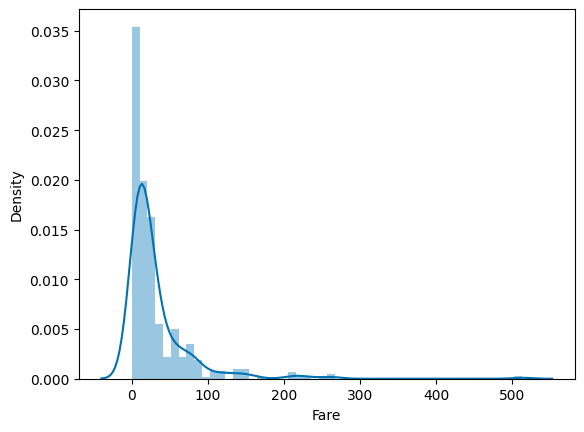

In [67]:
# длинный хвост распределения
sns.distplot(X_train['Fare'])
plt.show()

## Биннинг одинаковой ширины

Делим данные на N фиксированных бинов, одинаковой ширины

In [68]:
from sklearn.preprocessing import KBinsDiscretizer
enc_equal_width = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform').fit(X_train[['Fare']])

In [69]:
# видим одинаковый размер для каждого бина
enc_equal_width.bin_edges_

array([array([  0.    , 170.7764, 341.5528, 512.3292])], dtype=object)

In [70]:
result = enc_equal_width.transform(X_train[['Fare']])
pd.DataFrame(result)[0].value_counts()

,count
0,
0.0,610
1.0,11
2.0,2


In [71]:
# добавляем новый признак
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_equal_width'] = enc_equal_width.transform(X_train[['Fare']])
print(X_train_copy.head(10))

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_equal_width
857         1       1    male  51.0      0   26.5500               0.0
52          1       1  female  49.0      1   76.7292               0.0
386         0       3    male   1.0      5   46.9000               0.0
124         0       1    male  54.0      0   77.2875               0.0
578         0       3  female   NaN      1   14.4583               0.0
549         1       2    male   8.0      1   36.7500               0.0
118         0       1    male  24.0      0  247.5208               1.0
12          0       3    male  20.0      0    8.0500               0.0
157         0       3    male  30.0      0    8.0500               0.0
127         1       3    male  24.0      0    7.1417               0.0


## Биннинг по частотности

Деление на N бинов, где в каждом бине одинаковое количество объектов

In [72]:
enc_equal_freq = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile').fit(X_train[['Fare']])

In [73]:
# Оценка границ бинов
enc_equal_freq.bin_edges_

array([array([  0.        ,   8.69303333,  26.2875    , 512.3292    ])],
      dtype=object)

In [74]:
# одинаковое число объектов в каждом бине
result = enc_equal_freq.transform(X_train[['Fare']])
pd.DataFrame(result)[0].value_counts()

,count
0,
2.0,209
0.0,208
1.0,206


In [75]:
# добавляем новый признак
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_equal_freq'] = enc_equal_freq.transform(X_train[['Fare']])
print(X_train_copy.head(10))

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_equal_freq
857         1       1    male  51.0      0   26.5500              2.0
52          1       1  female  49.0      1   76.7292              2.0
386         0       3    male   1.0      5   46.9000              2.0
124         0       1    male  54.0      0   77.2875              2.0
578         0       3  female   NaN      1   14.4583              1.0
549         1       2    male   8.0      1   36.7500              2.0
118         0       1    male  24.0      0  247.5208              2.0
12          0       3    male  20.0      0    8.0500              0.0
157         0       3    male  30.0      0    8.0500              0.0
127         1       3    male  24.0      0    7.1417              0.0


## K-means биннинг

использование k-means алгоритма для деления в кластеры объектов

In [76]:
enc_kmeans = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans').fit(X_train[['Fare']])

In [77]:
# check the bin edges
enc_kmeans.bin_edges_

array([array([  0.        ,  93.5271531 , 338.08506324, 512.3292    ])],
      dtype=object)

In [78]:
result = enc_kmeans.transform(X_train[['Fare']])
pd.DataFrame(result)[0].value_counts()

,count
0,
0.0,587
1.0,34
2.0,2


In [79]:
# добавляем новый признак
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_kmeans'] = enc_kmeans.transform(X_train[['Fare']])
print(X_train_copy.head(10))

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_kmeans
857         1       1    male  51.0      0   26.5500          0.0
52          1       1  female  49.0      1   76.7292          0.0
386         0       3    male   1.0      5   46.9000          0.0
124         0       1    male  54.0      0   77.2875          0.0
578         0       3  female   NaN      1   14.4583          0.0
549         1       2    male   8.0      1   36.7500          0.0
118         0       1    male  24.0      0  247.5208          1.0
12          0       3    male  20.0      0    8.0500          0.0
157         0       3    male  30.0      0    8.0500          0.0
127         1       3    male  24.0      0    7.1417          0.0


## Дискретизация с решающим деревом

использование решающего дерева для определения ключевых точек разбиения и последующей дискретизации

In [80]:
enc1 = dc.DiscretizeByDecisionTree(col='Fare',max_depth=2).fit(X=X_train,y=y_train)

In [81]:
enc1.tree_model

DecisionTreeClassifier(max_depth=2)

In [82]:
data1 = enc1.transform(data)

In [83]:
# значения признака - вероятности решающего дерева принять данный класс для объекта
print(data1.head(5))

# the unique value of the discretisized column
print(data1.Fare_tree_discret.unique())

   Survived  Pclass     Sex   Age  SibSp     Fare  Fare_tree_discret
0         0       3    male  22.0      1   7.2500           0.107143
1         1       1  female  38.0      1  71.2833           0.442308
2         1       3  female  26.0      0   7.9250           0.255319
3         1       1  female  35.0      1  53.1000           0.442308
4         0       3    male  35.0      0   8.0500           0.255319
[0.10714286 0.44230769 0.25531915 0.74626866]


In [84]:
# у нас 2 класса, глубина дерева 2 -> всего 2^2 = 4 бина

# в листьях дерева метка классов

# группировка по вероятностям отношения к данному классу
col='Fare'
bins = pd.concat([data1.groupby([col+'_tree_discret'])[col].min(),
                  data1.groupby([col+'_tree_discret'])[col].max()], axis=1)
print(bins)

# заменяем каждое значение от 0 до 7.5208 на 0.107143 и так далее

                      Fare      Fare
Fare_tree_discret                   
0.107143            0.0000    7.5208
0.255319            7.5500   10.5167
0.442308           11.1333   73.5000
0.746269           75.2500  512.3292


# Кодирование признаков

In [85]:
import category_encoders as ce
from feature_engineering import encoding

### Кодирование признаков


#### Зачем важно кодирование признаков?

Мы должны преобразовать строки категориальных переменных в числа, чтобы алгоритмы машинного обучения могли обрабатывать эти значения. Даже если вы видите, что алгоритм может принимать категориальные входные данные, скорее всего, алгоритм включает в себя процесс кодирования.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

## One-hot encoding

Замена категориального признака 1 или 0, если данная категория верна для объекта. Чем больше категорий, тем больше новых признаков.

In [87]:
pd.get_dummies(X_train, drop_first=True)

,Survived,Pclass,Age,SibSp,Fare,Sex_male
857,1,1,51.0,0,26.5500,True
52,1,1,49.0,1,76.7292,False
386,0,3,1.0,5,46.9000,True
124,0,1,54.0,0,77.2875,True
578,0,3,NaN,1,14.4583,False
...,...,...,...,...,...,...
835,1,1,39.0,1,83.1583,False
192,1,3,19.0,1,7.8542,False
629,0,3,NaN,0,7.7333,True
559,1,3,36.0,1,17.4000,False


## Ordinal-encoding

Заполенение категорий порядковым значением, если этот порядок нужен

In [88]:
ord_enc = ce.OrdinalEncoder(cols=['Sex']).fit(X_train,y_train)

In [89]:
ord_enc.transform(X_train)

,Survived,Pclass,Sex,Age,SibSp,Fare
857,1,1,1,51.0,0,26.5500
52,1,1,2,49.0,1,76.7292
386,0,3,1,1.0,5,46.9000
124,0,1,1,54.0,0,77.2875
578,0,3,2,NaN,1,14.4583
...,...,...,...,...,...,...
835,1,1,2,39.0,1,83.1583
192,1,3,2,19.0,1,7.8542
629,0,3,1,NaN,0,7.7333
559,1,3,2,36.0,1,17.4000


## Mean encoding

Замена категории средним значением целевой переменной для этой категории. При тестировании используем значения трейна.

In [90]:
# Оценка среднего целевой переменной для пола
X_train['Survived'].groupby(data['Sex']).mean()

,Survived
Sex,
female,0.753488
male,0.196078


In [91]:
mean_enc = encoding.MeanEncoding(cols=['Sex']).fit(X_train,y_train)

In [92]:
mean_enc.transform(X_train)

,Survived,Pclass,Sex,Age,SibSp,Fare
857,1,1,0.196078,51.0,0,26.5500
52,1,1,0.753488,49.0,1,76.7292
386,0,3,0.196078,1.0,5,46.9000
124,0,1,0.196078,54.0,0,77.2875
578,0,3,0.753488,NaN,1,14.4583
...,...,...,...,...,...,...
835,1,1,0.753488,39.0,1,83.1583
192,1,3,0.753488,19.0,1,7.8542
629,0,3,0.196078,NaN,0,7.7333
559,1,3,0.753488,36.0,1,17.4000


## WOE-encoding

$WoE = log(p(X=x_j|Y=1)/(p(X=x_j|Y=0))$


* Если значения WoE отрицательны, отрицательные случаи превосходят положительные случаи для этой категории.
* Если значения WoE положительны, положительные случаи превосходят отрицательные случаи для этой категории.
* А если WoE равен 0, то положительных и отрицательных классов для этой категории поровну.

Если работаем с multi-class - то для каждого признака вычисляется WoE по статегии one-vs-all

In [93]:
woe_enc = ce.WOEEncoder(cols=['Sex']).fit(X_train,y_train)

In [94]:
woe_enc.transform(X_train)

,Survived,Pclass,Sex,Age,SibSp,Fare
857,1,1,-0.950742,51.0,0,26.5500
52,1,1,1.555633,49.0,1,76.7292
386,0,3,-0.950742,1.0,5,46.9000
124,0,1,-0.950742,54.0,0,77.2875
578,0,3,1.555633,NaN,1,14.4583
...,...,...,...,...,...,...
835,1,1,1.555633,39.0,1,83.1583
192,1,3,1.555633,19.0,1,7.8542
629,0,3,-0.950742,NaN,0,7.7333
559,1,3,1.555633,36.0,1,17.4000


### Замечания

* Если мы используем one-hot в линейной регрессии, нам следует сохранить k-1 one-hot признаков, чтобы избежать мультиколлинеарности. Это справедливо для любых ML алгоритмов, которые используют все признаки во время обучения - SVM, нейронные сети и алгоритмы кластеризации. С другой стороны, древовидному алгоритму необходим весь набор one-hot признаков для выбора наилучшего разделения.
* Но не рекомендуется использовать горячее кодирование с древовидными алгоритмами. One-hot приведет к тому, что разделение будет сильно несбалансированным (поскольку каждая метка исходного категориального признака теперь будет новым признаком), и в результате ни один из двух дочерних узлов не будет иметь значительного выигрыша в чистоте.

# Трансформация признаков

In [95]:
from feature_engineering import transformation

### Трансформация признаков

#### Зачем важна трансформация признаков?


Если модель машинного обучения предполагает **линейную зависимость** между предикторами X и результатом Y, когда такой **линейной связи нет**, модель будет демонстрировать **плохой результат**. В таких случаях лучше **попробовать другую модель машинного обучения**, которая не делает такого предположения.

Если **линейной связи нет**, и нам приходится использовать **линейные/логистические регрессионные модели**, **математическое преобразование данных ** может помочь создать связь, хотя это не гарантирует лучшего результата.

**Распределение переменных**

**Предположения линейной регрессии**
Линейная регрессия имеет следующие предположения относительно предикторов X:
- **Линейная зависимость с результатом Y**
- **Многомерная нормальность**
- **Отсутствие или слабая мультиколлинеарность**
- **Гомоскедастичность**

**Предположение о нормальности** означает, что каждая переменная X должна следовать **нормальному распределению Гаусса**.

**Гомоскедастичность**, также известная как **однородность дисперсии**, описывает ситуацию, при которой ошибка (то есть "шум" или случайное отклонение в отношении между независимыми переменными (X) и зависимой переменной (Y)) одинакова для всех значений независимых переменных.

**Нарушения предположений о гомоскедастичности и/или нормальности** (при условии, что распределение данных гомоскедастично или гауссово, когда на самом деле это не так) могут привести к **плохой производительности модели**.

Остальные модели машинного обучения, включая **нейронные сети, методы опорных векторов, методы на основе деревьев и PCA**, не делают каких-либо предположений относительно распределения независимых переменных. Тем не менее, во многих случаях **производительность модели может выиграть от "приведения к распределению Гаусса"**.

Почему **модели могут выиграть от "подобия к распределению Гаусса"**? В переменных с нормальным распределением наблюдения X, доступные для прогнозирования Y, изменяются в **бОльшем диапазоне значений**, а не сжимаются.

В вышеуказанных ситуациях **преобразование исходной переменной** может помочь сделать переменную более **похожей на распределение Гаусса**.


In [96]:
X_train, X_test, y_train, y_test = train_test_split(data[["Fare"]], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 1), (268, 1))

## Лог преобразование

Лог преобразование полезно, если его применяют к скошенному распределению. В скошенных распределениях данных, редкие большие значения формируют длинный хвост, а частые группируются вместе. Логарифм позволяет группировать данные и приводить их к нормальному распределению.

График Q-Q для переменной Fare_log


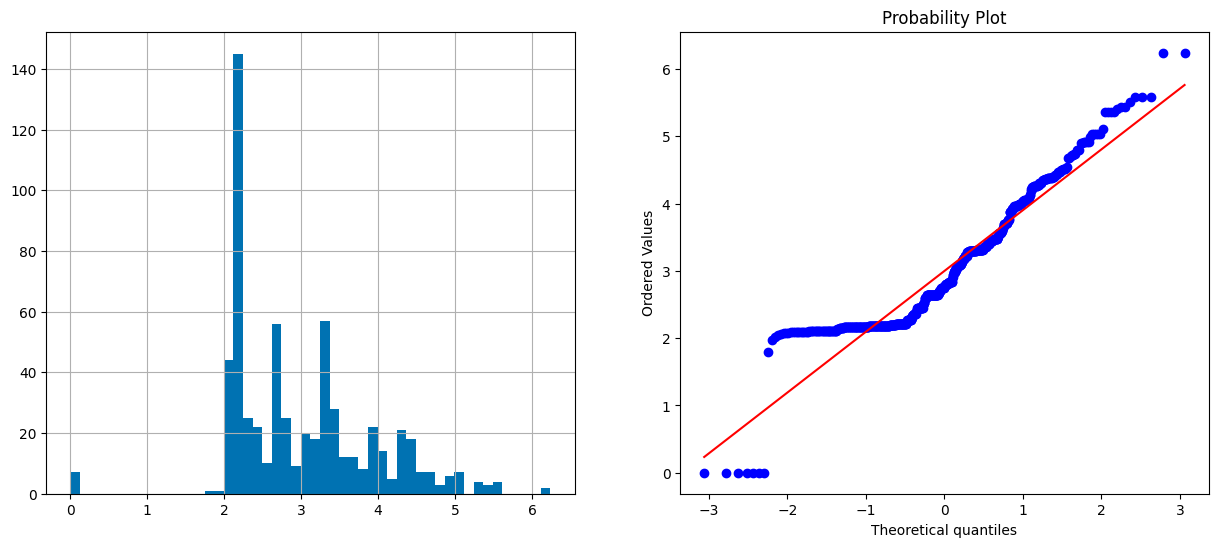

        Fare  Fare_log
857  26.5500  3.316003
52   76.7292  4.353231
386  46.9000  3.869116
124  77.2875  4.360388
578  14.4583  2.738146
549  36.7500  3.630985


In [97]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.log_transform(data=X_train,cols=['Fare'])
print(X_train_copy.head(6))

Мы можем использовать график Q-Q (график квантиль-квантиль) для проверки, является ли переменная нормально распределенной (линия под углом 45 градусов отображает значения на теоретические квантили) после преобразования.

## Обратное преобразование

Схоже с лог. преобразованием.

График Q-Q для переменной Fare_reciprocal


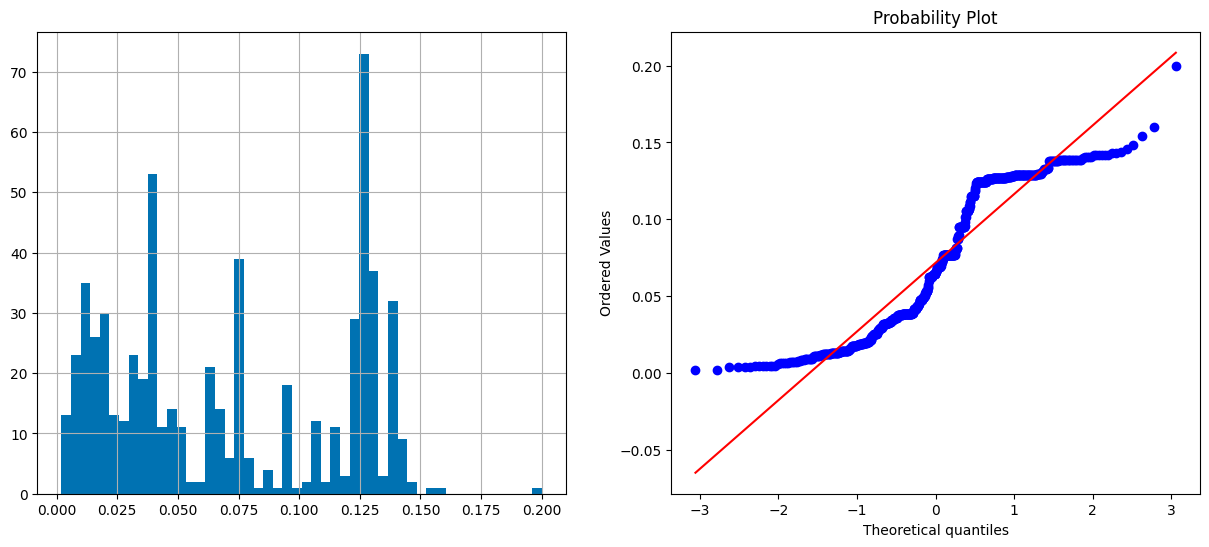

        Fare  Fare_reciprocal
857  26.5500         0.037665
52   76.7292         0.013033
386  46.9000         0.021322
124  77.2875         0.012939
578  14.4583         0.069164
549  36.7500         0.027211


In [98]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = X_train_copy[X_train_copy.Fare!=0] # x не должно быть 0
#X_train_copy[X_train_copy.Fare==0]
X_train_copy = transformation.reciprocal_transform(data=X_train_copy,cols=['Fare'])
print(X_train_copy.head(6))

## Преобразование с корнем

График Q-Q для переменной Fare_square_root


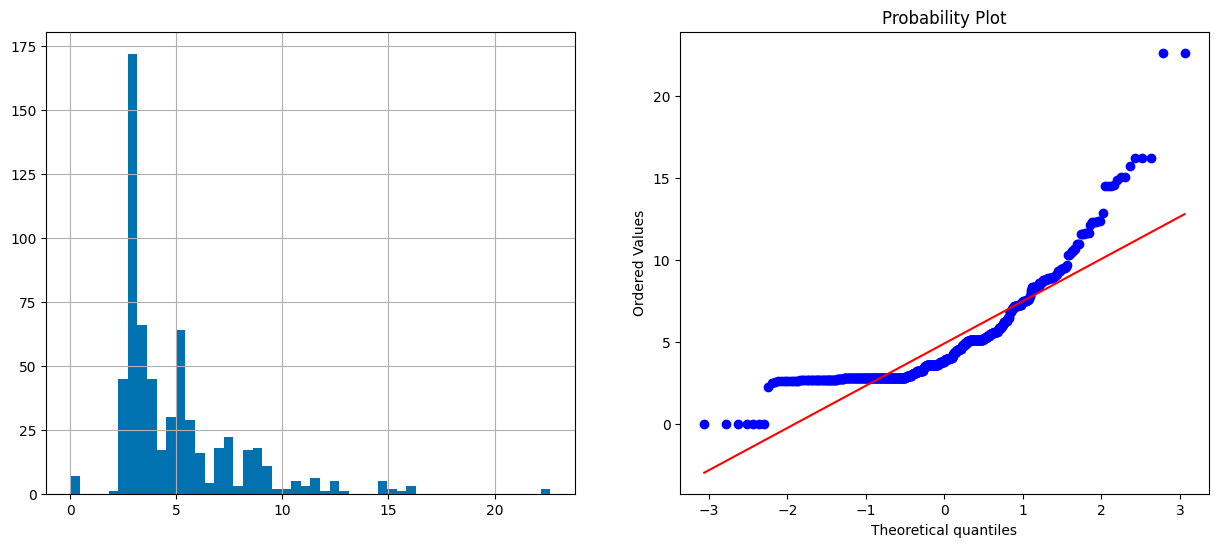

        Fare  Fare_square_root
857  26.5500          5.152669
52   76.7292          8.759521
386  46.9000          6.848357
124  77.2875          8.791331
578  14.4583          3.802407
549  36.7500          6.062178


In [99]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.square_root_transform(data=X_train,cols=['Fare'])
print(X_train_copy.head(6))

## Экспоненциальное преобразование

График Q-Q для переменной Fare_exp


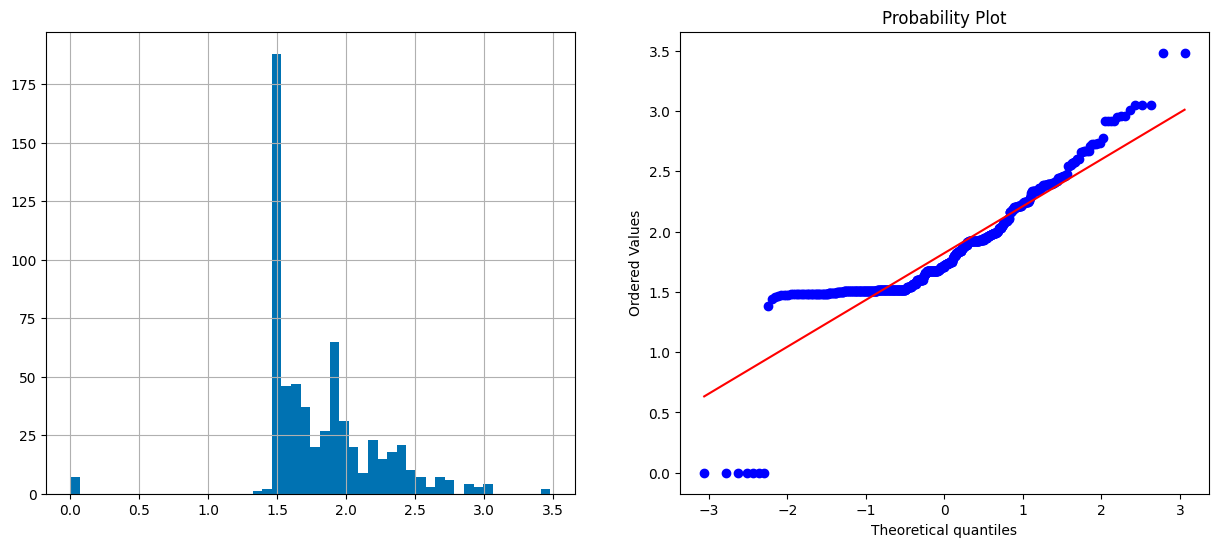

        Fare  Fare_exp
857  26.5500  1.926695
52   76.7292  2.382276
386  46.9000  2.158910
124  77.2875  2.385733
578  14.4583  1.706174
549  36.7500  2.056134


In [100]:
X_train_copy = X_train.copy(deep=True)
X_train_copy = transformation.exp_transform(data=X_train,cols=['Fare'],coef=0.2)
print(X_train_copy.head(6))

## Box-cox преобразование

Эта функция имеет предварительное условие: числовые значения, которые требуется преобразовать, должны быть положительными (аналогично ожиданиям при логарифмическом преобразовании). Если они отрицательны, то смещение с использованием постоянного значения может помочь.

$
f(x, \lambda) =
\begin{cases}
\frac{{x^\lambda - 1}}{\lambda}, & \text{if } \lambda > 0 \\
\log(x), & \text{if } \lambda = 0
\end{cases}
$

In [101]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_boxcox'] = pt.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

        Fare  Fare_boxcox
857  26.5500     0.398696
52   76.7292     1.401774
386  46.9000     0.950718
124  77.2875     1.408228
578  14.4583    -0.222897
549  36.7500     0.718007


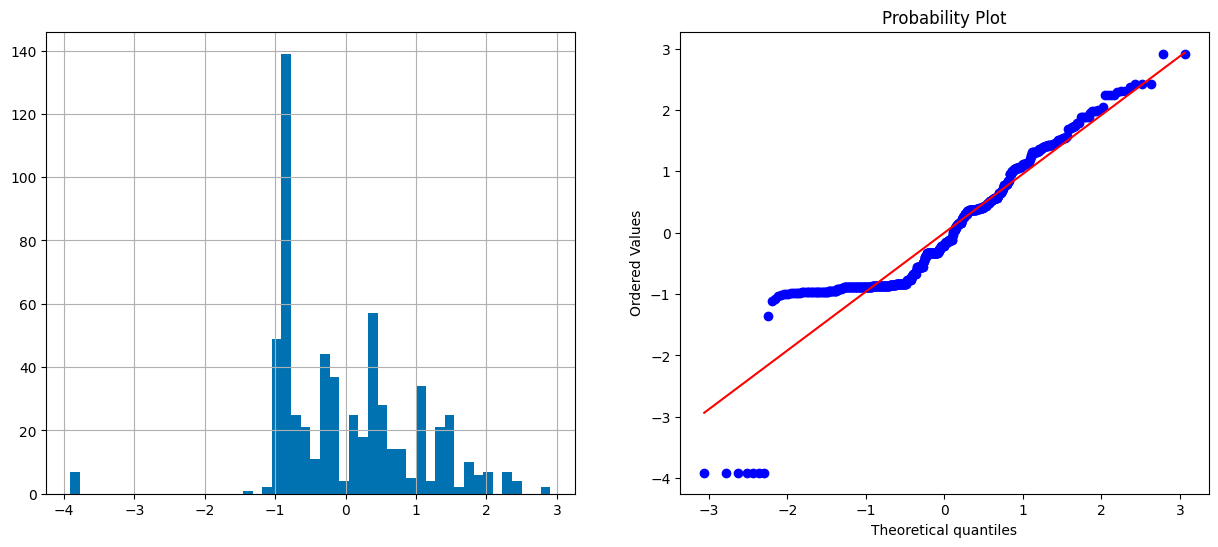

In [102]:
transformation.diagnostic_plots(X_train_copy,'Fare_boxcox')

## Квантильное преобразование

Преобразование применяется к каждому признаку независимо. Сначала используется оценка кумулятивной функции распределения признака для отображения исходных значений на равномерное распределение. Затем полученные значения отображаются на желаемое целевое распределение с использованием соответствующей квантильной функции. Значения признаков новых/невидимых данных, которые находятся ниже или выше подходящего диапазона, будут отображены на границы целевого распределения. Обратите внимание, что это преобразование является нелинейным. Оно может исказить линейные корреляции между переменными, измеренными в одном и том же масштабе, но делает переменные, измеренные в разных масштабах, более непосредственно сравнимыми.

In [103]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal').fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_qt'] = qt.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

        Fare   Fare_qt
857  26.5500  0.470128
52   76.7292  1.269732
386  46.9000  0.841047
124  77.2875  1.287991
578  14.4583 -0.022167
549  36.7500  0.744471


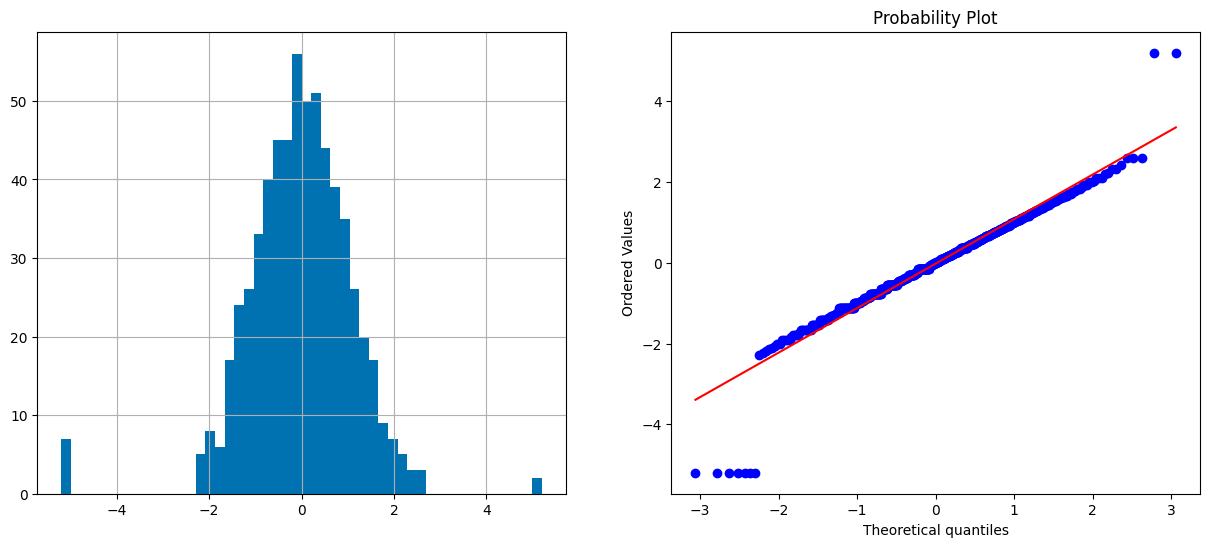

In [104]:
transformation.diagnostic_plots(X_train_copy,'Fare_qt')

Примеры преобразования из различных распределений в нормальное с помощью разных трансформаций:

![data-transformation-example](https://scikit-learn.org/stable/_images/sphx_glr_plot_map_data_to_normal_001.png)

# Генерация признаков

In [105]:
from sklearn.metrics import roc_auc_score

In [106]:
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

### Производный признак на основе отсутствующих данных

Как упомянуто в разделе про пропуски, мы можем создать новый бинарный признак, обозначающий, есть ли у наблюдений отсутствующее значение в исходном признаке, со значением 0/1.

### Простой статистический производный признак

   Создание новых признаков путем выполнения простых статистических расчетов на основе исходных признаков, включая:
   - count/sum (количество/сумма)
   - average/median/mode (среднее/медиана/мода)
   - max/min (максимум/минимум)
   - stddev/variance (стандартное отклонение/дисперсия)
   - range/IQR (размах/межквартильный размах)
   - Coefficient of Variation (коэффициент вариации)
   - time span/interval (промежуток времени/интервал)

   Возьмем, например, журнал звонков: мы можем создать новые признаки, такие как: количество звонков, количество входящих/исходящих звонков, средняя длительность звонков, средняя длительность звонков в месяц, максимальная длительность звонков и так далее.

### Пересечение признаков

   После получения нескольких простых статистических производных признаков, мы можем объединить их вместе. Общие измерения, используемые для пересечения, включают:
   - время
   - регион
   - типы бизнеса

   Продолжим использовать журнал звонков в качестве примера: мы можем создать пересекающиеся признаки, такие как: количество звонков в ночное/дневное время, количество звонков в различных типах бизнеса (банки/такси/путешествия/гостиничный бизнес), количество звонков за последние 3 месяца и многое другое. Многие из статистических расчетов, упомянутых в предыдущем пункте, могут быть использованы снова для создания дополнительных признаков.


### Отношения и пропорции

Для прогнозирования будущей производительности продаж кредитных карт в отделении, отношения, такие как продажи по кредитным картам / продавец или продажи по кредитным картам / маркетинговые расходы, будут более мощными, чем просто использование абсолютного числа проданных карт в отделении.

### Произведения категориальных признаков

 Предположим, у нас есть категориальный признак A с двумя возможными значениями {A1, A2}. Пусть B будет признаком с вариантами {B1, B2}. Тогда перекрестный признак между A и B примет одно из следующих значений: {(A1, B1), (A1, B2), (A2, B1), (A2, B2)}. Вы можете дать этим "комбинациям" любые имена, которые вам нравятся. Просто помните, что каждая комбинация обозначает синергию между информацией, содержащейся в соответствующих значениях A и B.

### Полиномиальное расширение

 Произведение признаков также может применяться к числовым признакам, что приводит к созданию нового взаимодействующего признака между A и B. Это можно легко сделать с помощью `PolynomialFeatures` из библиотеки sklearn, которая генерирует новый набор признаков, состоящий из всех полиномиальных комбинаций признаков с степенью, меньшей или равной заданной степени. Например, три исходных признака {X1, X2, X3} могут создать набор признаков {1, X1X2, X1X3, X2X3, X1X2X3} со степенью 2.

In [107]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2,include_bias=False).fit(X_train[['Pclass','SibSp']])
tmp = pf.transform(X_train[['Pclass','SibSp']])
X_train_copy = pd.DataFrame(tmp,columns=pf.get_feature_names_out(['Pclass','SibSp']))
print(X_train_copy.head(6))

   Pclass  SibSp  Pclass^2  Pclass SibSp  SibSp^2
0     1.0    0.0       1.0           0.0      0.0
1     1.0    1.0       1.0           1.0      1.0
2     3.0    5.0       9.0          15.0     25.0
3     1.0    0.0       1.0           0.0      0.0
4     3.0    1.0       9.0           3.0      1.0
5     2.0    1.0       4.0           2.0      1.0


## Feature Learning by Trees


В алгоритмах, основанных на деревьях, каждому образцу будет назначен определенный листовой узел. Путь принятия решения к каждому узлу можно рассматривать как новый нелинейный признак, и мы можем создать N новых бинарных признаков, где n равно общему числу листовых узлов в дереве или ансамбле деревьев. Затем признаки можно передавать в другие алгоритмы, такие как логистическая регрессия.
   
  Идея использования алгоритма дерева для создания новых признаков была впервые представлена Facebook в этой [статье](http://quinonero.net/Publications/predicting-clicks-facebook.pdf).
   
   Хорошей чертой этого метода является то, что мы можем получить сложные комбинации нескольких признаков, что информативно (как создано алгоритмом обучения дерева). Это позволяет сэкономить нам много времени по сравнению с ручным созданием пересекающихся признаков и широко используется в CTR (кликабельность) в индустрии онлайн-рекламы.


In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

ensemble = GradientBoostingClassifier(n_estimators=20)
one_hot = OneHotEncoder()

X_train = X_train[[ 'Pclass', 'Age', 'Fare', 'SibSp']].fillna(0)
X_test = X_test[[ 'Pclass', 'Age', 'Fare', 'SibSp']].fillna(0)

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict_proba(X_test)[:, 1]

print("ROC-AUC GBDT score：", roc_auc_score(y_test, y_pred))

ROC-AUC GBDT score： 0.7613988095238096


In [109]:
X_leaf_index = ensemble.apply(X_train)[:, :, 0] # получаем список индексов листьев дерева
one_hot.fit(X_leaf_index)
X_one_hot = one_hot.transform(X_leaf_index)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_one_hot,y_train)
y_pred = lr.predict_proba(
    one_hot.transform(ensemble.apply(X_test)[:, :, 0]))[:, 1]
print("ROC-AUC GBDT derived feature + LR：", roc_auc_score(y_test, y_pred))

ROC-AUC GBDT derived feature + LR： 0.7733035714285714


### Обучение признаков с использованием глубоких нейронных сетей

Cоздание признаков вручную требует много усилий и не всегда гарантирует хороший результат, особенно когда у нас много признаков для работы. Обучение признаков с использованием деревьев можно рассматривать как первую попытку создания признаков автоматически. Нейронные сети и подходы, таких как автоэнкодеры и Transfer Learning, демонстрируют успехи в извелечении признаков. Однако такие признаки имеют ограниченную интерпретируемость, и для извлечения качественных результатов нейронной сетью требуется гораздо больше данных.

# Отбор признаков

**Отбор признаков** - это процесс выбора подмножества признаков для обучения при построении модели машинного обучения.

#### Зачем важен отбор признаков?


Не всегда правда, что чем больше данных, тем лучше будет результат. Включение нерелевантных признаков (те, которые просто не помогают в прогнозе) и избыточных признаков (нерелевантных в присутствии других) только сделает процесс обучения перегруженным и увеличит вероятность переобучения.
С помощью выбора признаков мы можем достичь следующих целей:
- упрощение моделей для их более легкого интерпретации;
- сокращение времени обучения и снижение вычислительных затрат;
- уменьшение затрат на сбор данных;
- избегание "проклятия размерности";
- улучшение обобщения путем снижения переобучения.

Следует помнить, что разные подмножества признаков обеспечивают оптимальную производительность для разных алгоритмов. Поэтому это не отдельный процесс, а часть обучения модели машинного обучения. Если мы выбираем признаки для линейной модели, лучше использовать процедуры выбора, связанные с линейными моделями, например, размер весов или Lasso. А если мы выбираем признаки для обучения деревьев, лучше использовать признаки отобранные с помощью алгоритмов с деревьями.

In [110]:
from feature_selection import filter_method as ft

### Загрузка данных

In [111]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [112]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [113]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'], axis=1),
                                                    data.target, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

### Метод дисперсий

Удаление признаков, у которых практически все значения одинаковые

In [114]:
quasi_constant_feature = ft.constant_feature_detect(data=X_train,threshold=0.9)

0  переменных считаются почти постоянными


In [115]:
# создадим пример признака, где значения являются практически одинаковыми
X_train['dummy'] = np.floor(X_train['worst smoothness']*10)
# > 92% значений признака обладают значением 1
X_train['dummy'].value_counts() / len(X_train)

,count
dummy,
1.0,0.923077
0.0,0.068132
2.0,0.008791


In [116]:
quasi_constant_feature = ft.constant_feature_detect(data=X_train,threshold=0.9)
quasi_constant_feature

1  переменных считаются почти постоянными


['dummy']

In [117]:
# удалим это значение
X_train.drop(labels=quasi_constant_feature,axis=1,inplace=True)
print(X_train.shape)

(455, 30)


## Метод корреляций

Удаление признаков, которые сильно скоррелированны друг с другом

In [118]:
corr = ft.corr_feature_detect(data=X_train,threshold=0.9)
for i in corr:
    print(i,'\n')

       feature1         feature2      corr
0   mean radius   mean perimeter  0.998185
5   mean radius        mean area  0.987094
17  mean radius     worst radius  0.969537
20  mean radius  worst perimeter  0.966220
35  mean radius       worst area  0.941185 

           feature1      feature2      corr
12  perimeter error  radius error  0.978323
30  perimeter error    area error  0.944995 

               feature1              feature2      corr
36  mean concave points        mean concavity  0.914627
41  mean concave points  worst concave points  0.906312 

        feature1       feature2      corr
38  mean texture  worst texture  0.908182 



* Коррелированные признаки не обязательно влияют на производительность модели (при использовании алгоритмов на деревьях, например), но высокая размерность влияет, а слишком большое количество функций ухудшает интерпретируемость модели. Поэтому всегда лучше уменьшить количество коррелирующих функций.

**Отбор признаков с помощью алгоритмов** - использует собственный процесс выбора переменных и выполняет отбор признаков и регрессию/классификацию одновременно. Распространенными встроенными методами являются Lasso и различные виды деревьев решений. Он характеризуется следующим:

- Выполняет отбор признаков как часть процесса построения модели.
- Учитывает взаимодействия между признаками.
- Менее вычислительно затратен, так как обучает модель только один раз, в отличие от методов обёртки (Wrappers).
- Обычно предоставляет наилучший поднабор признаков для данного алгоритма машинного обучения, но, возможно, не для другого.

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [120]:
data = load_breast_cancer()
data = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [121]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'], axis=1),
                                                    data.target, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

## Lasso

Lasso(L1) позволяет некоторые коэффициенты сократить до 0, тем самым избавится от лишних признаков.

In [122]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [123]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [124]:
selected_feat = X_train.columns[(sel_.get_support())]

print('Всего признаков: {}'.format((X_train.shape[1])))
print('Выбранные признаки: {}'.format(len(selected_feat)))
print('Признаки с 0 коэффициентами: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

Всего признаков: 30
Выбранные признаки: 14
Признаки с 0 коэффициентами: 16


In [125]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['mean radius', 'mean perimeter', 'mean area', 'mean smoothness',
       'mean compactness', 'mean concavity', 'mean fractal dimension',
       'texture error', 'perimeter error', 'smoothness error',
       'concavity error', 'concave points error', 'symmetry error',
       'worst radius', 'worst perimeter', 'worst compactness'],
      dtype='object')

In [126]:
# удаляем выбранные признаки из нашего датасета
X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)

X_train_selected.shape, X_test_selected.shape

((455, 14), (114, 14))

## Random Forest


In [127]:
# отбор признаков с порогом > 0.1
from sklearn.feature_selection import SelectFromModel

model = RandomForestClassifier(n_estimators=100,max_depth=20,
                            random_state=42,
                            n_jobs=-1)
model.fit(X_train, y_train)

feature_selection = SelectFromModel(model, threshold=0.1,prefit=True)
selected_feat = X_train.columns[(feature_selection.get_support())]
selected_feat

Index(['worst area', 'worst concave points'], dtype='object')

In [128]:
# отбор признаков, со значением больше 2ух медиан
feature_selection2 = SelectFromModel(model, threshold='2*median',prefit=True)
selected_feat2 = X_train.columns[(feature_selection2.get_support())]
selected_feat2

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concavity', 'worst concave points'],
      dtype='object')

## Gradient Boosting

In [129]:
# отбор признаков с порогом > 0.1

model = GradientBoostingClassifier(n_estimators=100, max_depth=10,
                                  random_state=42)
model.fit(X_train, y_train)

feature_selection = SelectFromModel(model, threshold=0.01,prefit=True)
selected_feat = X_train.columns[(feature_selection.get_support())]
selected_feat

Index(['mean area', 'mean smoothness', 'mean symmetry', 'worst texture',
       'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points'],
      dtype='object')

In [130]:
# отбор признаков, со значением больше 2ух медиан
feature_selection2 = SelectFromModel(model, threshold='2*median',prefit=True)
selected_feat2 = X_train.columns[(feature_selection2.get_support())]
selected_feat2

Index(['mean radius', 'mean perimeter', 'mean area', 'mean smoothness',
       'mean symmetry', 'area error', 'smoothness error', 'worst texture',
       'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points'],
      dtype='object')

## Перемешивание значений признаков

Обучаем модель и получаем исходное значение метрики(accuracy/roc_auc/mse)
Случайно меняем значения каждого признака и предсказываем моделью целевую переменную. Смотрим, насколько такая перестановка снижает исходную метрику.
Если признак важен, это очень предсказуемо: случайное перестановка значений уменьшит метрику.

In [131]:
from feature_selection import feature_shuffle

In [132]:
auc_drop, selected_features = feature_shuffle.feature_shuffle_rf(X_train=X_train,
                                                                 y_train=y_train,
                                                                 random_state=0)

In [133]:
selected_features

,feature
22,worst perimeter
27,worst concave points
12,perimeter error
23,worst area


In [134]:
# выбираем те признаки, что снижают качество
auc_drop

,feature,auc_drop
22,worst perimeter,8.359457e-05
27,worst concave points,3.134796e-05
12,perimeter error,1.110223e-16
23,worst area,1.110223e-16
2,mean perimeter,0.000000e+00
0,mean radius,0.000000e+00
5,mean compactness,0.000000e+00
6,mean concavity,0.000000e+00
8,mean symmetry,0.000000e+00
7,mean concave points,0.000000e+00


## Forward selection

Сортируем признаки по значимости. Далее обучаем модель на самом значимом признаке. После этого итеративно добавляем следующий по значимости признак в модель. Если метрика улучшилась больше чем на заранее заданную константу, то оставляем этот признак, иначе удаляем. Можно делать гибкое сэмплирование признаков с пропорциональными их значимости вероятностями.

In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def forward_selection(X_train, y_train, X_test, y_test, threshold=0.0, n_estimators=10, max_depth=2, random_state=0, class_weight=None, n_jobs=-1):
    """
    Выполняет прямой отбор признаков на основе улучшения метрики ROC-AUC.

    Parameters:
    X_train (DataFrame): Обучающие данные.
    y_train (Series): Целевая переменная.
    X_test (DataFrame): Валидационные данные.
    y_test (Series): Целевая переменная.
    threshold (float, optional): Пороговое значение для улучшения метрики,
                                 выше которого признак добавляется. По умолчанию 0.0.
    n_estimators (int, optional): Количество деревьев в RandomForestClassifier. По умолчанию 10.
    max_depth (int, optional): Максимальная глубина деревьев в RandomForestClassifier. По умолчанию 2.
    random_state (int, optional): random_state для RandomForestClassifier. По умолчанию 0.
    class_weight (str or dict, optional): class_weight для RandomForestClassifier. По умолчанию None.
    n_jobs (int, optional): n_jobs для RandomForestClassifier. По умолчанию -1.

    Returns:
    list: Список выбранных признаков.
    """
    selected_features = []

    # Initial model training to get feature importances
    initial_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                         random_state=random_state, class_weight=class_weight,
                                         n_jobs=n_jobs)
    initial_model.fit(X_train, y_train)

    # Get and sort feature importances
    feature_importances = pd.Series(initial_model.feature_importances_, index=X_train.columns)
    sorted_features = feature_importances.sort_values(ascending=False).index.tolist()

    remaining_features = sorted_features.copy()
    best_score = -1

    for feature in remaining_features:
        current_features = selected_features + [feature]
        X_train_subset = X_train[current_features]
        X_test_subset = X_test[current_features]

        # Обучаем модель
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                        random_state=random_state, class_weight=class_weight,
                                        n_jobs=n_jobs)
        model.fit(X_train_subset, y_train)

        # Оцениваем модель
        y_pred = model.predict_proba(X_test_subset)[:, 1]
        score = roc_auc_score(y_test, y_pred)

        if score > best_score + threshold:
            best_score = score
            selected_features.append(feature)
            print(f"Добавлен признак: {feature}, ROC-AUC: {best_score:.4f}")
        else:
            print(f"Не добавлен признак: {feature}, ROC-AUC: {score:.4f}")

    return selected_features

# Пример использования:
selected_features = forward_selection(X_train, y_train, X_test, y_test)
print("Выбранные признаки:", selected_features)

Добавлен признак: worst concave points, ROC-AUC: 0.9543
Добавлен признак: mean concave points, ROC-AUC: 0.9711
Добавлен признак: area error, ROC-AUC: 0.9740
Добавлен признак: mean concavity, ROC-AUC: 0.9755
Добавлен признак: worst radius, ROC-AUC: 0.9911
Добавлен признак: mean area, ROC-AUC: 0.9957
Не добавлен признак: radius error, ROC-AUC: 0.9936
Не добавлен признак: mean perimeter, ROC-AUC: 0.9946
Не добавлен признак: worst perimeter, ROC-AUC: 0.9946
Не добавлен признак: mean radius, ROC-AUC: 0.9943
Не добавлен признак: worst fractal dimension, ROC-AUC: 0.9943
Не добавлен признак: worst concavity, ROC-AUC: 0.9949
Не добавлен признак: fractal dimension error, ROC-AUC: 0.9940
Не добавлен признак: perimeter error, ROC-AUC: 0.9940
Добавлен признак: worst area, ROC-AUC: 0.9963
Не добавлен признак: worst symmetry, ROC-AUC: 0.9960
Не добавлен признак: smoothness error, ROC-AUC: 0.9957
Не добавлен признак: mean fractal dimension, ROC-AUC: 0.9959
Не добавлен признак: mean smoothness, ROC-AUC

## Backward selection
Сортируем все признаки по значимости (feature importance). Пробуем удалить самый незначимый признак. Если метрика не падает больше чем на заданную константу, то удаляем этот признак, иначе оставляем. Если признак удалён, то пересчитываем feature_importance и повторно сортируем оставшиеся признаки по значимости. Повторяем эти пункты пока количество признаков больше 1 или пока все признаки не будут проверены.

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def backward_selection_with_recalculation(X_train, y_train, X_test, y_test, threshold=0.0025, n_estimators=10, max_depth=2, random_state=0, class_weight=None, n_jobs=-1):
    """
    Выполняет обратный отбор признаков с пересчетом значимости после каждого удаления.

    Parameters:
    X_train (DataFrame): Обучающие данные.
    y_train (Series): Целевая переменная.
    X_test (DataFrame): Валидационные данные.
    y_test (Series): Целевая переменная.
    threshold (float, optional): Пороговое значение для падения метрики,
                                 ниже которого признак не удаляется. По умолчанию 0.0025.
    n_estimators (int, optional): Количество деревьев в RandomForestClassifier. По умолчанию 10.
    max_depth (int, optional): Максимальная глубина деревьев в RandomForestClassifier. По умолчанию 2.
    random_state (int, optional): random_state для RandomForestClassifier. По умолчанию 0.
    class_weight (str or dict, optional): class_weight для RandomForestClassifier. По умолчанию None.
    n_jobs (int, optional): n_jobs для RandomForestClassifier. По умолчанию -1.

    Returns:
    list: Список выбранных признаков.
    """
    selected_features = list(X_train.columns)

    while len(selected_features) > 1:
        # Train model with current features and get baseline score
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                         random_state=random_state, class_weight=class_weight,
                                         n_jobs=n_jobs)
        model.fit(X_train[selected_features], y_train)
        best_score = roc_auc_score(y_test, model.predict_proba(X_test[selected_features])[:, 1])

        # Get and sort feature importances of current features
        feature_importances = pd.Series(model.feature_importances_, index=selected_features)
        sorted_features_to_remove = feature_importances.sort_values(ascending=True).index.tolist()

        # Iterate through features to potentially remove, starting with least important
        feature_removed_in_iter = False
        for feature_to_remove in sorted_features_to_remove:
            current_features = [f for f in selected_features if f != feature_to_remove]
            X_train_subset = X_train[current_features]
            X_test_subset = X_test[current_features]

            # Train model without the feature
            model_without_feature = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                                            random_state=random_state, class_weight=class_weight,
                                                            n_jobs=n_jobs)
            model_without_feature.fit(X_train_subset, y_train)

            # Evaluate model without the feature
            y_pred = model_without_feature.predict_proba(X_test_subset)[:, 1]
            score_without_feature = roc_auc_score(y_test, y_pred)

            if score_without_feature >= best_score - threshold:
                selected_features.remove(feature_to_remove)
                print(f"Удален признак: {feature_to_remove}, Новый ROC-AUC: {score_without_feature:.4f}")
                feature_removed_in_iter = True
                break # Recalculate feature importance and re-sort in the next iteration of the while loop
            else:
                print(f"Не удалось удалить признак: {feature_to_remove}, Падение ROC-AUC слишком велико: {best_score - score_without_feature:.4f}")
                # If this feature cannot be removed, the loop continues to the next least important feature

        if not feature_removed_in_iter:
          # If no feature was removed in this iteration, stop the process
          print("Нет признаков для удаления, удовлетворяющих пороговому значению.")
          break

    return selected_features

# Пример использования:
selected_features_backward = backward_selection_with_recalculation(X_train, y_train, X_test, y_test)
print("Выбранные признаки (Backward Selection):", selected_features_backward)

Удален признак: mean texture, Новый ROC-AUC: 0.9917
Удален признак: mean perimeter, Новый ROC-AUC: 0.9949
Удален признак: mean compactness, Новый ROC-AUC: 0.9927
Удален признак: mean area, Новый ROC-AUC: 0.9908
Удален признак: mean smoothness, Новый ROC-AUC: 0.9913
Не удалось удалить признак: mean radius, Падение ROC-AUC слишком велико: 0.0027
Удален признак: mean symmetry, Новый ROC-AUC: 0.9898
Удален признак: mean radius, Новый ROC-AUC: 0.9933
Удален признак: mean fractal dimension, Новый ROC-AUC: 0.9929
Не удалось удалить признак: texture error, Падение ROC-AUC слишком велико: 0.0059
Не удалось удалить признак: perimeter error, Падение ROC-AUC слишком велико: 0.0037
Не удалось удалить признак: smoothness error, Падение ROC-AUC слишком велико: 0.0052
Не удалось удалить признак: concave points error, Падение ROC-AUC слишком велико: 0.0059
Не удалось удалить признак: worst symmetry, Падение ROC-AUC слишком велико: 0.0027
Не удалось удалить признак: worst fractal dimension, Падение ROC-

## Shap values

(455, 30) (114, 30)


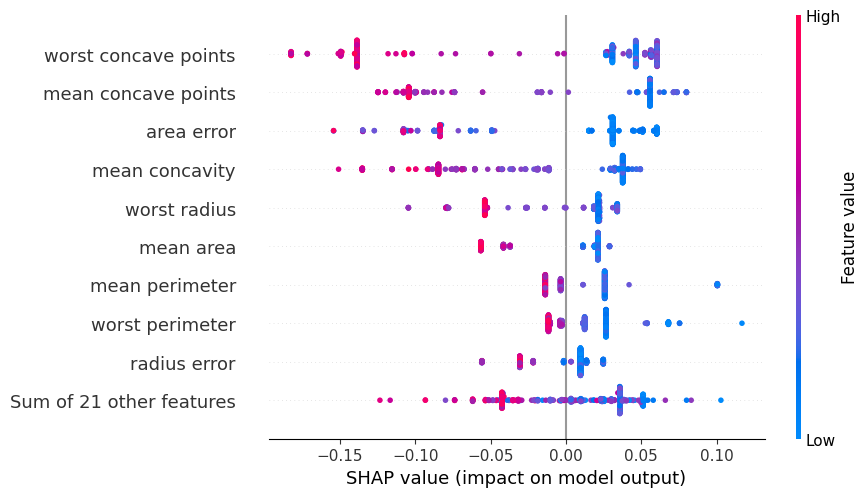

In [137]:
import shap

# Assuming 'model' and 'X_train' are already defined and trained from previous cells
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'], axis=1),
                                                    data.target, test_size=0.2,
                                                    random_state=0)
print(X_train.shape, X_test.shape)

model = RandomForestClassifier(n_estimators=10, max_depth=2,
                                         random_state=0, class_weight=None,
                                         n_jobs=-1)

model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

# Use shap.summary_plot which supports multi-dimensional instances
shap.plots.beeswarm(shap_values[:, :, 1])

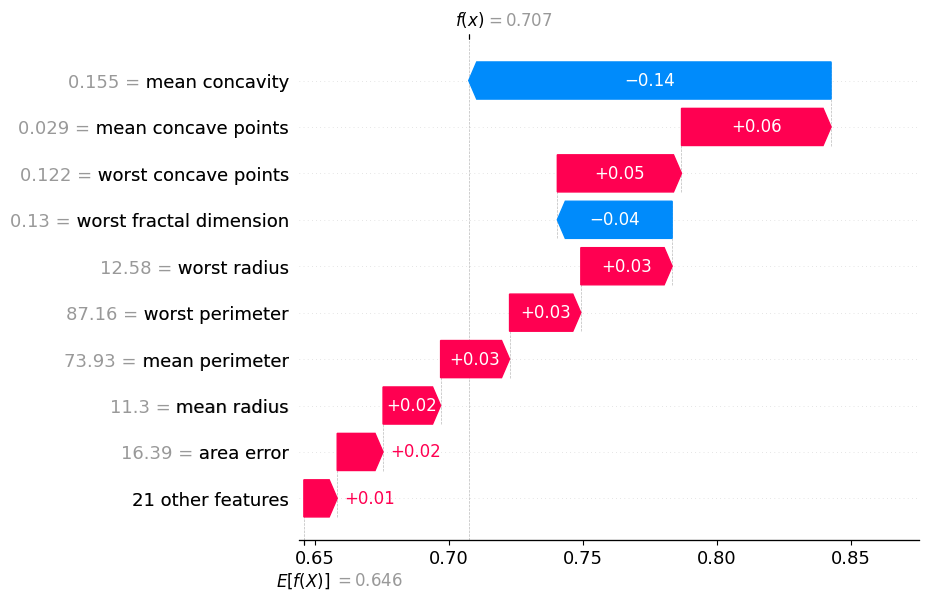

In [156]:
shap.plots.waterfall(shap_values[20, :, 1], max_display=10)